# Hackathon: Shinkansen Travel Experience

## Context

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named **‘Traveldata_train.csv’**.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled **‘Surveydata_train.csv’**.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled **‘Overall_Experience’**.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## Objective

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

## Data Description


The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

- Train_Data
- Test_Data

Target Variable: **Overall_Experience** (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Data Dictionary:

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

## Submission

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Import Dataset

In [ ]:
# Mount the drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset from Google Drive
survey_train = pd.read_csv('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/Surveydata_train.csv')
travel_train = pd.read_csv('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/Traveldata_train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the files if using Jupyter Notebook
# survey_train = pd.read_csv("Surveydata_train.csv")
# travel_train = pd.read_csv("Traveldata_train.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
survey = survey_train.copy()
travel = travel_train.copy()

### View the first and last 5 rows of the dataset

In [ ]:
survey.head(5)

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [ ]:
travel.head(5)

ID  Gender   Customer_Type      Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer 52.00000              NaN     Business   
1  98800002    Male  Loyal Customer 48.00000  Personal Travel          Eco   
2  98800003  Female  Loyal Customer 43.00000  Business Travel     Business   
3  98800004  Female  Loyal Customer 44.00000  Business Travel     Business   
4  98800005  Female  Loyal Customer 50.00000  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                  0.00000                5.00000  
1             2200                  9.00000                0.00000  
2             1061                 77.00000              119.00000  
3              780                 13.00000               18.00000  
4             1981                  0.00000                0.00000

### Understand the shape of the dataset

In [ ]:
survey.shape

(94379, 17)

In [ ]:
travel.shape

(94379, 9)

### Check the data types of the columns for the dataset

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
# let's check for missing values in the data
round(survey.isnull().sum() / survey.isnull().count() * 100, 2)

ID                        0.00000
Overall_Experience        0.00000
Seat_Comfort              0.06000
Seat_Class                0.00000
Arrival_Time_Convenient   9.46000
Catering                  9.26000
Platform_Location         0.03000
Onboard_Wifi_Service      0.03000
Onboard_Entertainment     0.02000
Online_Support            0.10000
Ease_of_Online_Booking    0.08000
Onboard_Service           8.05000
Legroom                   0.10000
Baggage_Handling          0.15000
CheckIn_Service           0.08000
Cleanliness               0.01000
Online_Boarding           0.01000
dtype: float64

**Observations:**

There are 94379 observations and 17 columns in the dataset survey.
There are missing values for:
- Seat_Comfort (0.06%)
- Arrival_Time_Convenient (9.46%)
- Catering (9.26%)
- Platform_Location (0.03%)
- Onboard_Wifi_Service (0.03%)
- Onboard_Entertainment(0.02%)
- Online_Support (0.1%)
- Ease_of_Online_Booking (0.08%)
- Onboard_Service (8.05%)
- Legroom (0.10%)
- Baggage_Handling (0.15%)
- CheckIn_Service (0.08%)
- Cleanliness (0.01%)
- Online_Boarding (0.01%)

All columns are of object data type except the columns "ID" and "Overall_Experience"  which are numeric.

In [ ]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
# let's check for missing values in the data
round(travel.isnull().sum() / travel.isnull().count() * 100, 2)

ID                        0.00000
Gender                    0.08000
Customer_Type             9.48000
Age                       0.03000
Type_Travel               9.78000
Travel_Class              0.00000
Travel_Distance           0.00000
Departure_Delay_in_Mins   0.06000
Arrival_Delay_in_Mins     0.38000
dtype: float64

**Observations:**

There are 94379 observations and 9 columns in the dataset travel.
There are missing values for:
- Gender  (0.08%)
- Customer_Type (9.48%)
- Age (0.03%)
- Type_Travel (9.78%)
- Departure_Delay_in_Mins (0.06%)
- Arrival_Delay_in_Mins (0.38%)


All columns are numeric except the columns "Gender", "Customer_Type", "Type_Travel"  and "Travel_Class"  which are of object data type.


In [ ]:
# checking for duplicate values
survey.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

**Observations:**

Passenger IDs are unique, and all the other columns are categorical.

In [ ]:
# checking for duplicate values
travel.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

**Observations:**

Passenger IDs are unique, and Gender, Customer_Type, Type_Travel and Travel_Class are categorical.

Let's merge the two datasets and then drop the column "ID".

In [ ]:
# Merging the 2 dataframes on the ID column
df=pd.merge(survey, travel, on='ID', how='inner')

# Looking at the first 5 rows
df.head(5)

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  \
0  Needs Improvement               Good  Needs Improvement            Poor   
1               Poor  Needs Improvement               Good            Good   
2          Excellent               Good          Excellent       Excellent   
3         Acceptable               Good         Acceptable      Acceptable   
4               Good               Good               Good            Good   

   Gender   Customer_Type      Age      Type_Travel Travel_Class  \
0  Female  Loyal Customer 52.00000              NaN     Business   
1    Male  Loyal Customer 48.00000  Personal Travel          Eco   
2  Female  Loyal Customer 43.00000  Business Travel     Business   
3  Female  Loyal Customer 44.00000  Business Travel     Business   
4  Female  Loyal Customer 50.00000  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                  0.00000                5.00000  
1             2200                  9.00000                0.00000  
2             1061                 77.00000              119.00000  
3              780                 13.00000               18.00000  
4             1981                  0.00000                0.00000

In [ ]:
# Checking the shape making sure that all columns (17+9-1) are present
df.shape

(94379, 25)

In [ ]:
# Dropping the "ID" column
df.drop(columns = "ID", inplace = True)

In [ ]:
# Copying the dataframe
df_orig = df.copy()

# Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [ ]:
#Summary of numeric values
df.describe().T

count       mean        std      min        25%  \
Overall_Experience      94379.00000    0.54666    0.49782  0.00000    0.00000   
Age                     94346.00000   39.41965   15.11663  7.00000   27.00000   
Travel_Distance         94379.00000 1978.88818 1027.96102 50.00000 1359.00000   
Departure_Delay_in_Mins 94322.00000   14.64709   38.13878  0.00000    0.00000   
Arrival_Delay_in_Mins   94022.00000   15.00522   38.43941  0.00000    0.00000   

                               50%        75%        max  
Overall_Experience         1.00000    1.00000    1.00000  
Age                       40.00000   51.00000   85.00000  
Travel_Distance         1923.00000 2538.00000 6951.00000  
Departure_Delay_in_Mins    0.00000   12.00000 1592.00000  
Arrival_Delay_in_Mins      0.00000   13.00000 1584.00000

**Observations:**

- The mean overall experience is 0.54.
- The mean age of the passengers is 39 years old with the youngest being 7 and oldest 85 years old.
- The mean travel distance is 1979 ranging from 50 to 6951.
- The mean departure delay is 14 minutes and the mean arrival delay is 15 minutes.


In [ ]:
#Summary of non-numeric variables
df.describe(exclude = 'number').T

count unique              top   freq
Seat_Comfort             94318      6       Acceptable  21158
Seat_Class               94379      2        Green Car  47435
Arrival_Time_Convenient  85449      6             Good  19574
Catering                 85638      6       Acceptable  18468
Platform_Location        94349      6       Manageable  24173
Onboard_Wifi_Service     94349      6             Good  22835
Onboard_Entertainment    94361      6             Good  30446
Online_Support           94288      6             Good  30016
Ease_of_Online_Booking   94306      6             Good  28909
Onboard_Service          86778      6             Good  27265
Legroom                  94289      6             Good  28870
Baggage_Handling         94237      5             Good  34944
CheckIn_Service          94302      6             Good  26502
Cleanliness              94373      6             Good  35427
Online_Boarding          94373      6             Good  25533
Gender                   94302      2           Female  47815
Customer_Type            85428      2   Loyal Customer  69823
Type_Travel              85153      2  Business Travel  58617
Travel_Class             94379      2              Eco  49342

**Observations:**

- The most frequent travel class is Eco
- The most frequent travel type is Business Travel
- The most frequent gender is Female
- The most popular rating is Good except for Catering and Seat Comfort (Acceptable) and Platform Location (Manageable)

In [ ]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
--------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------------
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64
--------------------------------------------------
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64
--------------------------------------------------
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981


### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# Function using countplot
# and where percentage of each bin is indicated

def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data1=data
    data1[z] = data1[z].astype('category')

    ax = sns.countplot(x=z, data=data1, palette='Paired', order=data1[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()


# Function using countplot
# and where percentage of each bin is indicated
# and where we have the 6 categories：Extremely Poor， Poor， Needs Improvement， Acceptable， Good， Excellent

def bar_perc6(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data1=data
    data1[z] = data1[z].astype('category')

    ax = sns.countplot(x=z, data=data1, palette='Paired', order=['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()


def bar_perc6bis(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data1=data
    data1[z] = data1[z].astype('category')

    ax = sns.countplot(x=z, data=data1, palette='Paired', order=['Very Inconvenient','Inconvenient','Needs Improvement','Manageable','Convenient','Very Convenient'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()

### Observations on Overall Experience

In [ ]:
bar_perc(df,'Overall_Experience')

### Observations on Age

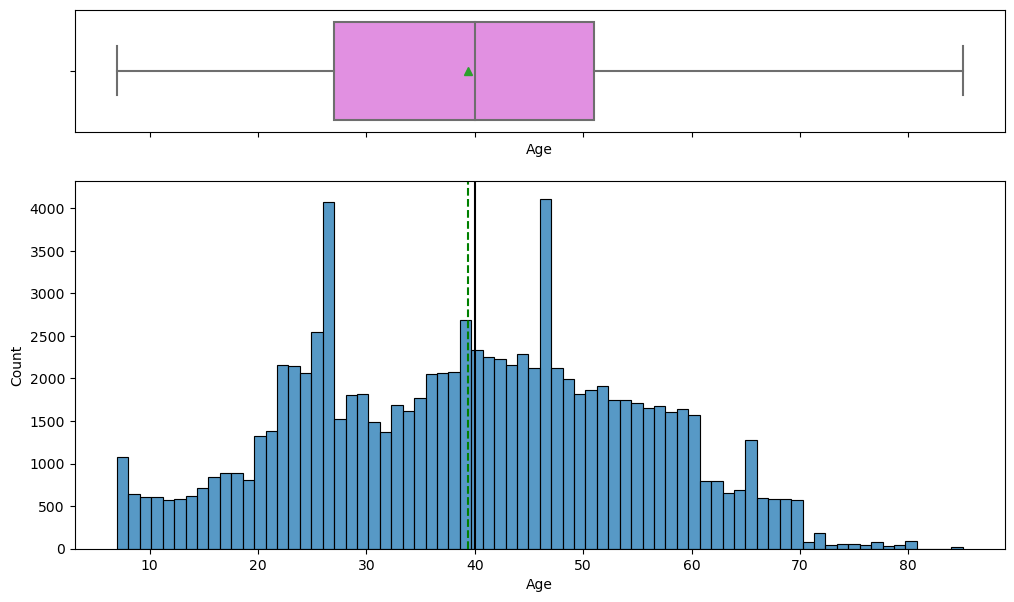

In [ ]:
histogram_boxplot(df_orig, "Age")

### Observations on Gender

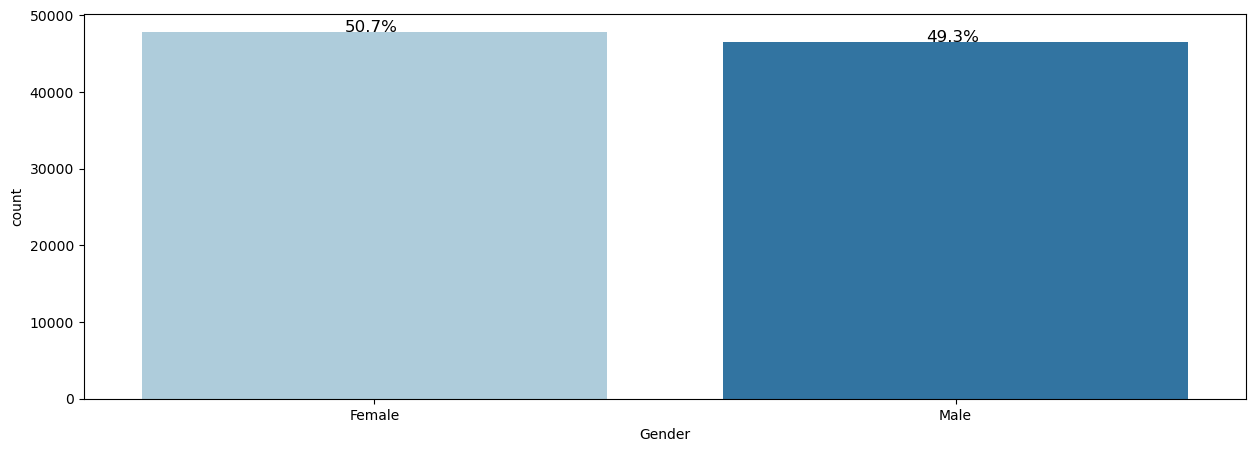

In [ ]:
bar_perc(df,'Gender')

### Observations on Customer Type

In [ ]:
bar_perc(df,'Customer_Type')

### Observations on Travel Type

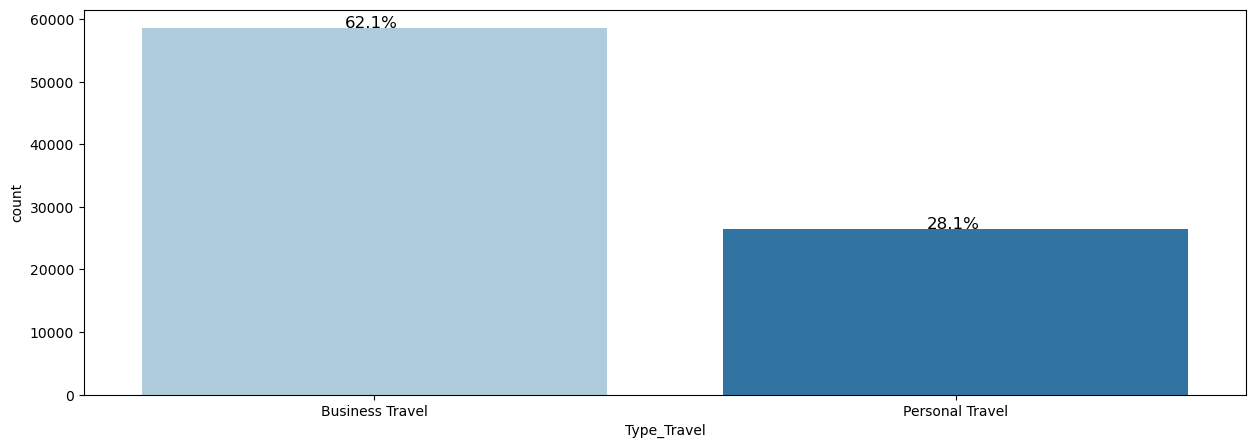

In [ ]:
bar_perc(df,'Type_Travel')

### Observations on Travel Class

In [ ]:
bar_perc(df,'Travel_Class')

### Observations on Departure Delay

In [ ]:
histogram_boxplot(df_orig, "Departure_Delay_in_Mins")

### Observations on Arrival Delay

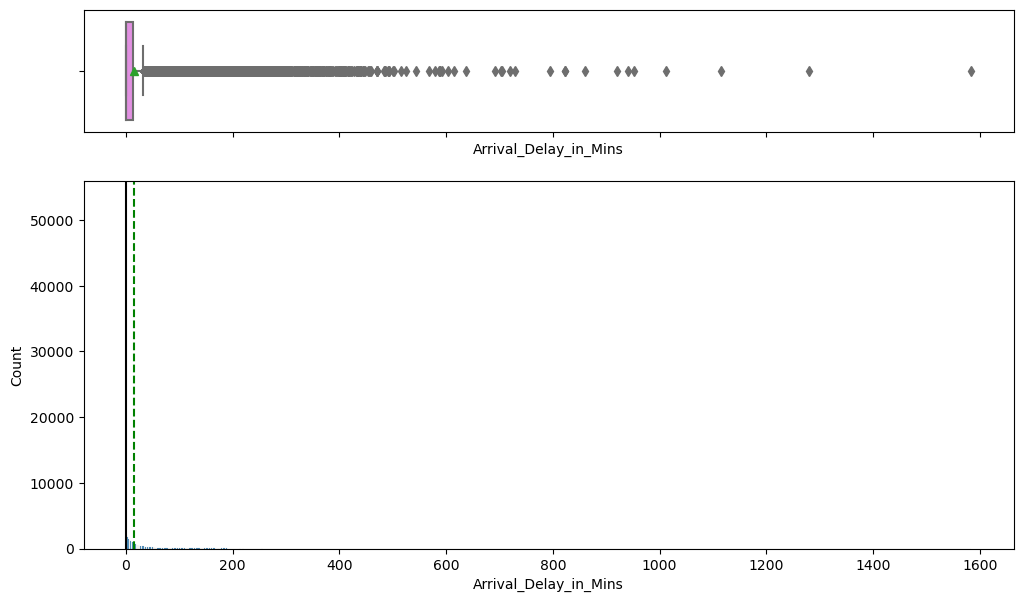

In [ ]:
histogram_boxplot(df, "Arrival_Delay_in_Mins")

### Observations on Seat Comfort

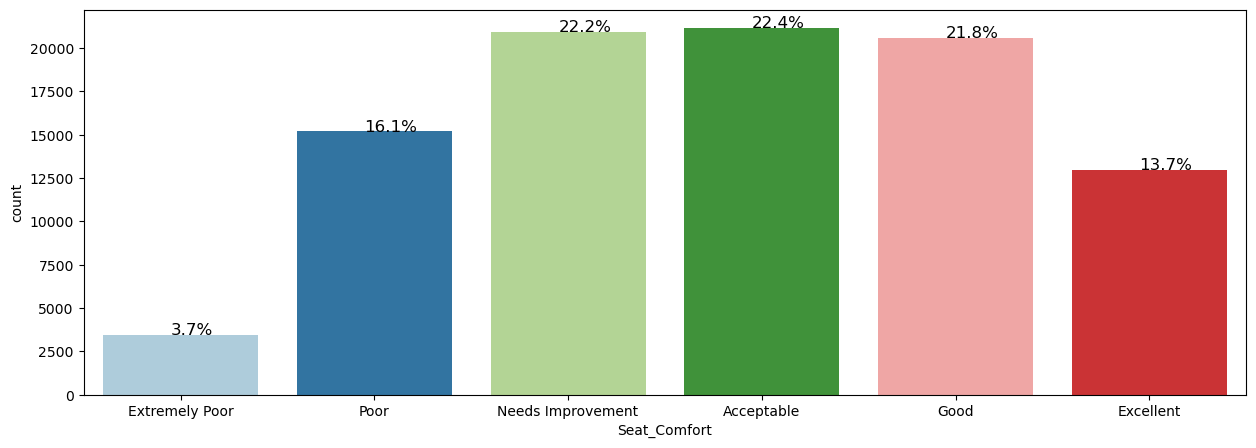

In [ ]:
bar_perc6(df,'Seat_Comfort')

### Observations on Seat Class

In [ ]:
bar_perc(df,'Seat_Class')

### Observations on Catering

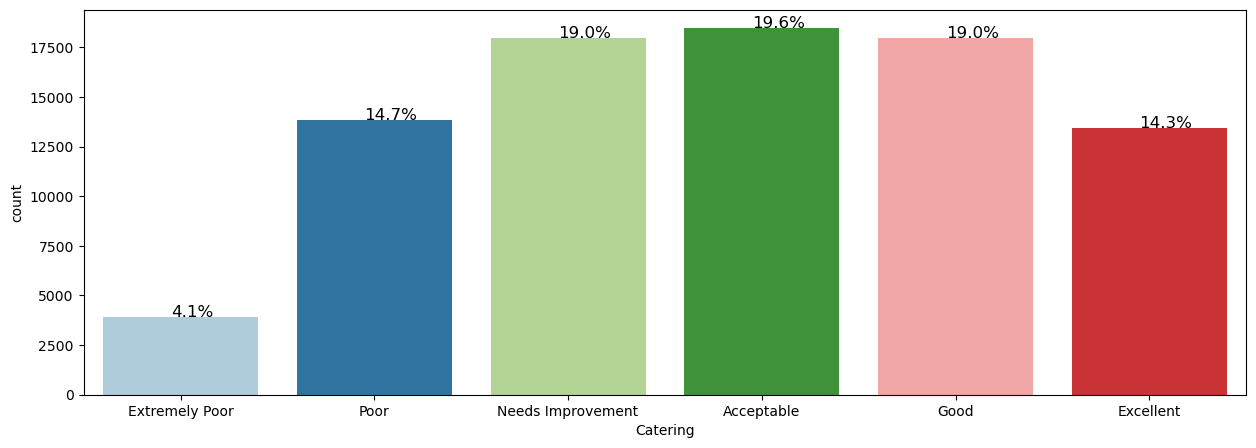

In [ ]:
bar_perc6(df,'Catering')

### Observations on Platform Location

In [ ]:
bar_perc6bis(df,'Platform_Location')

### Observations on Onboard Wifi Service

In [ ]:
bar_perc6(df,'Onboard_Wifi_Service')

### Observations on Onboard Entertainment

In [ ]:
bar_perc6(df,'Onboard_Entertainment')

### Observations on Online Support

In [ ]:
bar_perc6(df,'Online_Support')

### Observations on Ease of Online Booking

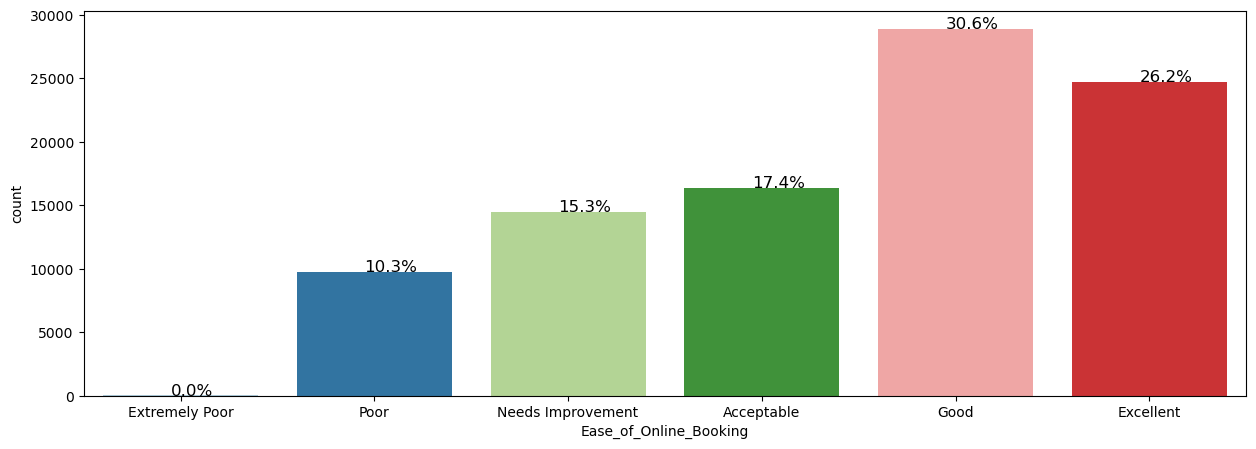

In [ ]:
bar_perc6(df,'Ease_of_Online_Booking')

### Observations on Onboard_Service

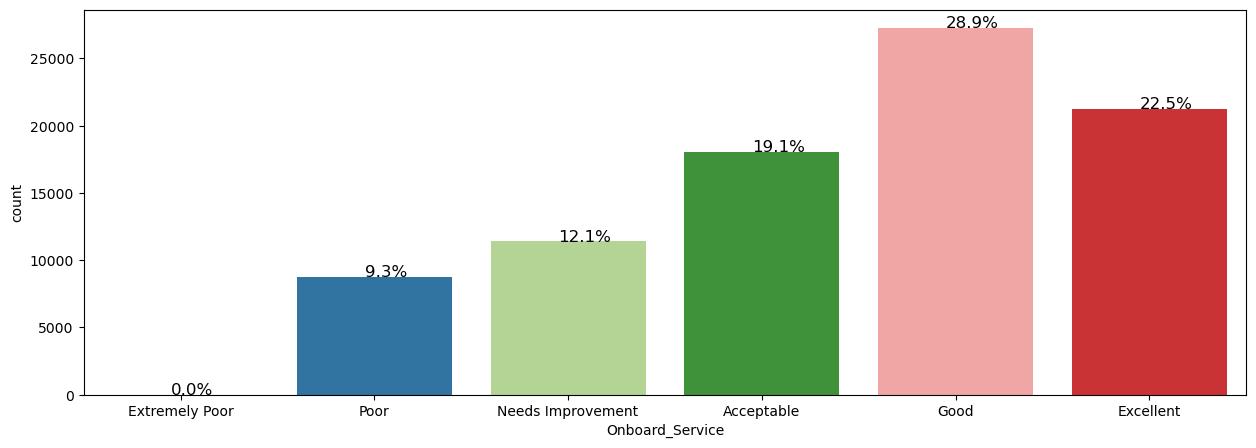

In [ ]:
bar_perc6(df,'Onboard_Service')

### Observations on Legroom

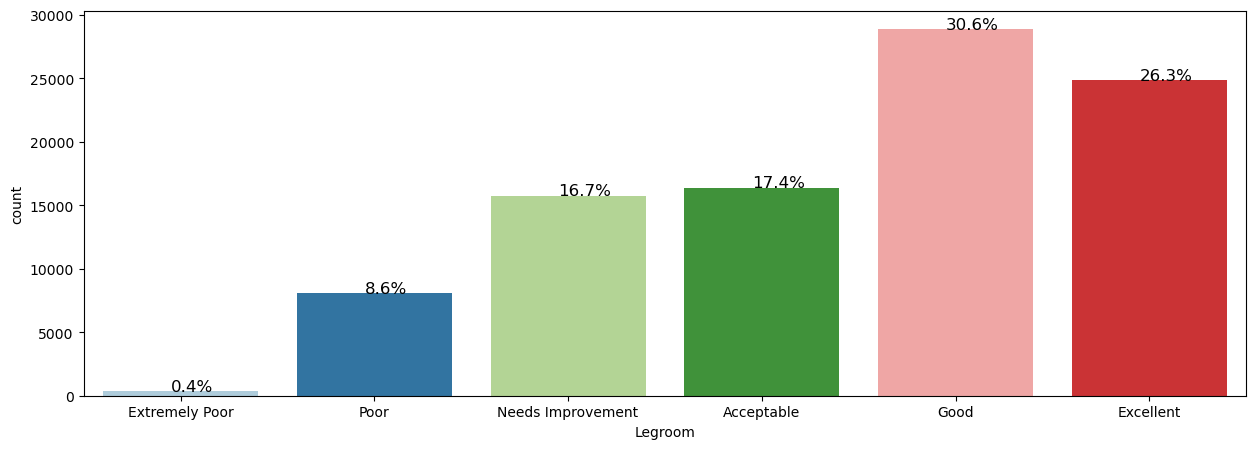

In [ ]:
bar_perc6(df,'Legroom')

### Observations on Baggage Handling

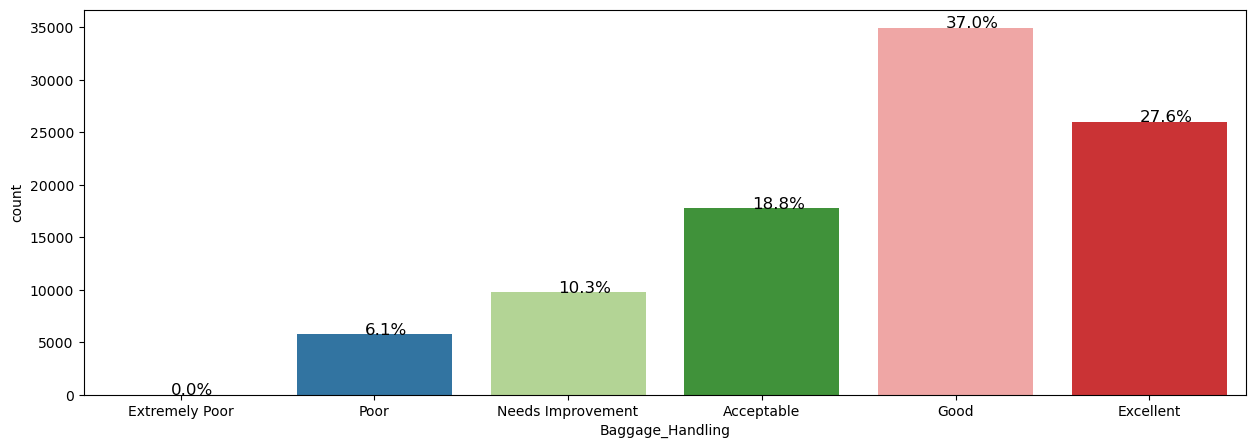

In [ ]:
bar_perc6(df,'Baggage_Handling')

### Observations on Check In Service

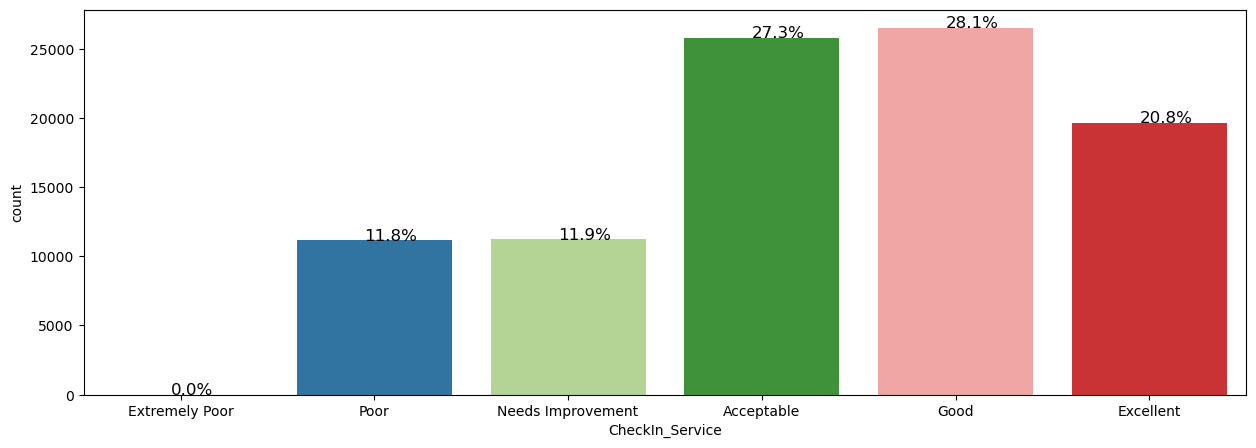

In [ ]:
bar_perc6(df,'CheckIn_Service')

### Observations on Cleanliness

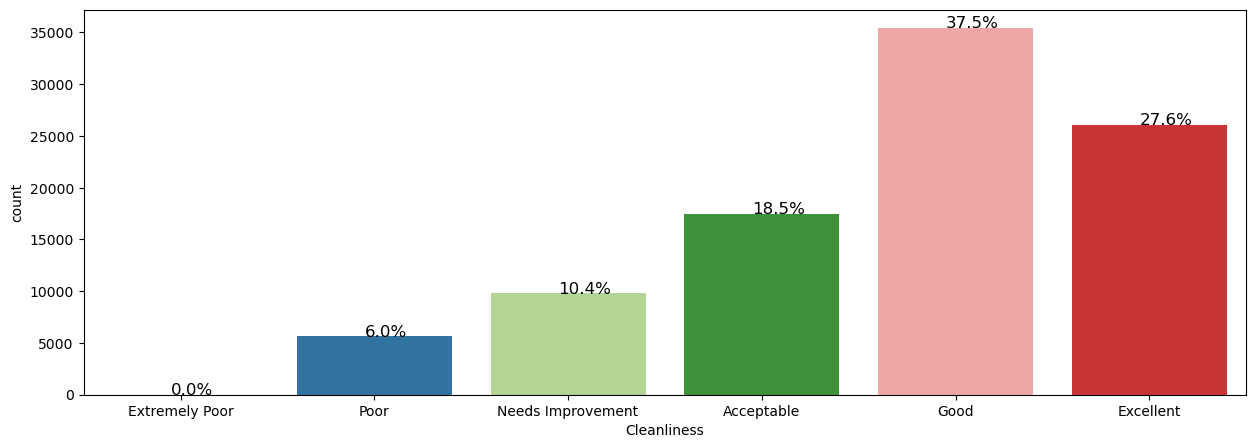

In [ ]:
bar_perc6(df,'Cleanliness')

### Observations on Online Boarding

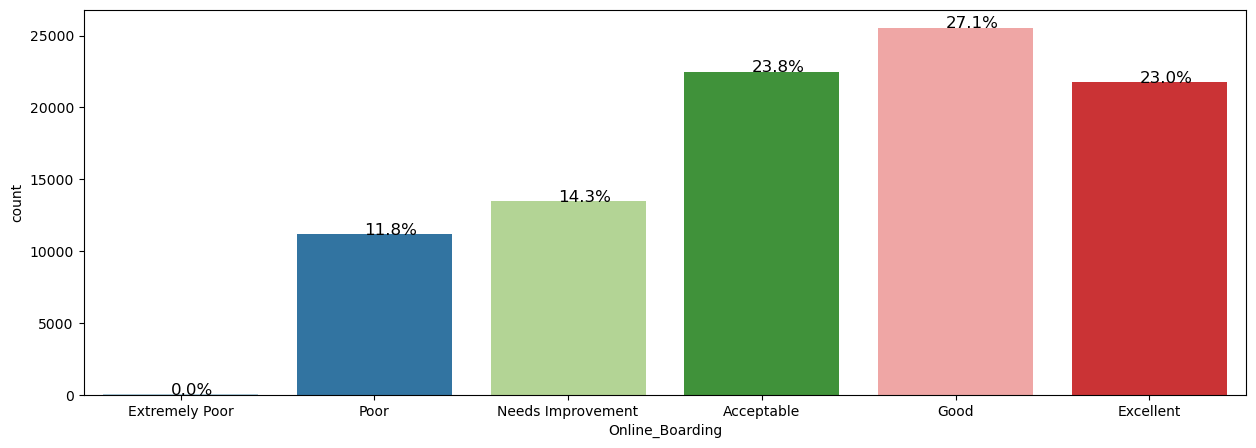

In [ ]:
bar_perc6(df,'Online_Boarding')

**Observations from Univariate Analysis ______**

### Bivariate Analysis

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Not Satisfied")
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="red",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of Satisfied")
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="green",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=['red', 'green'])
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="lower left", bbox_to_anchor=(1, 1))

    # Adding custom labels to the legend
    #plt.legend(labels=['Not Sat', 'Sat'])
    plt.show()

### Observations on Overall Experience and Gender

Overall_Experience      0      1    All
Gender                                 
All                 42747  51555  94302
Male                26111  20376  46487
Female              16636  31179  47815
------------------------------------------------------------------------------------------------------------------------


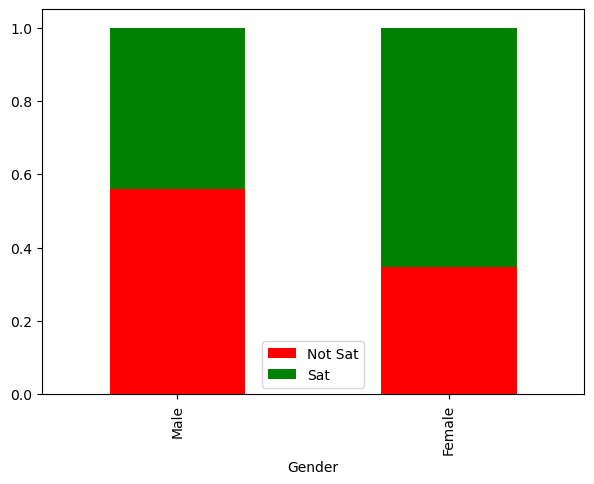

In [ ]:
stacked_barplot(df, "Gender", "Overall_Experience")

### Observations on Overall Experience and Customer Type

Overall_Experience      0      1    All
Customer_Type                          
All                 38663  46765  85428
Loyal Customer      26794  43029  69823
Disloyal Customer   11869   3736  15605
------------------------------------------------------------------------------------------------------------------------


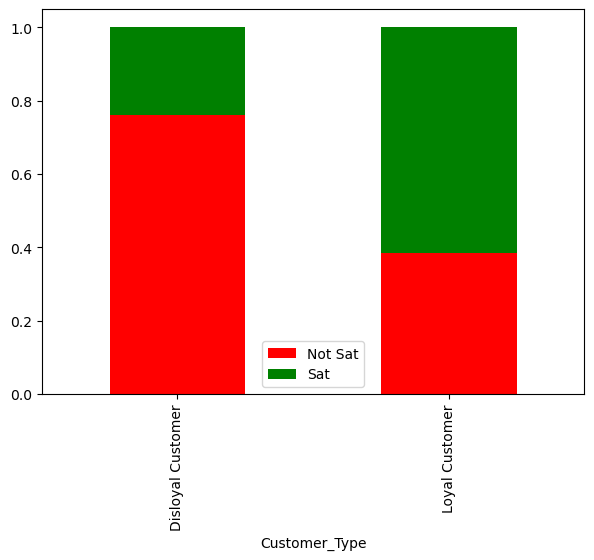

In [ ]:
stacked_barplot(df, "Customer_Type", "Overall_Experience")

### Observations on Overall Experience and Age

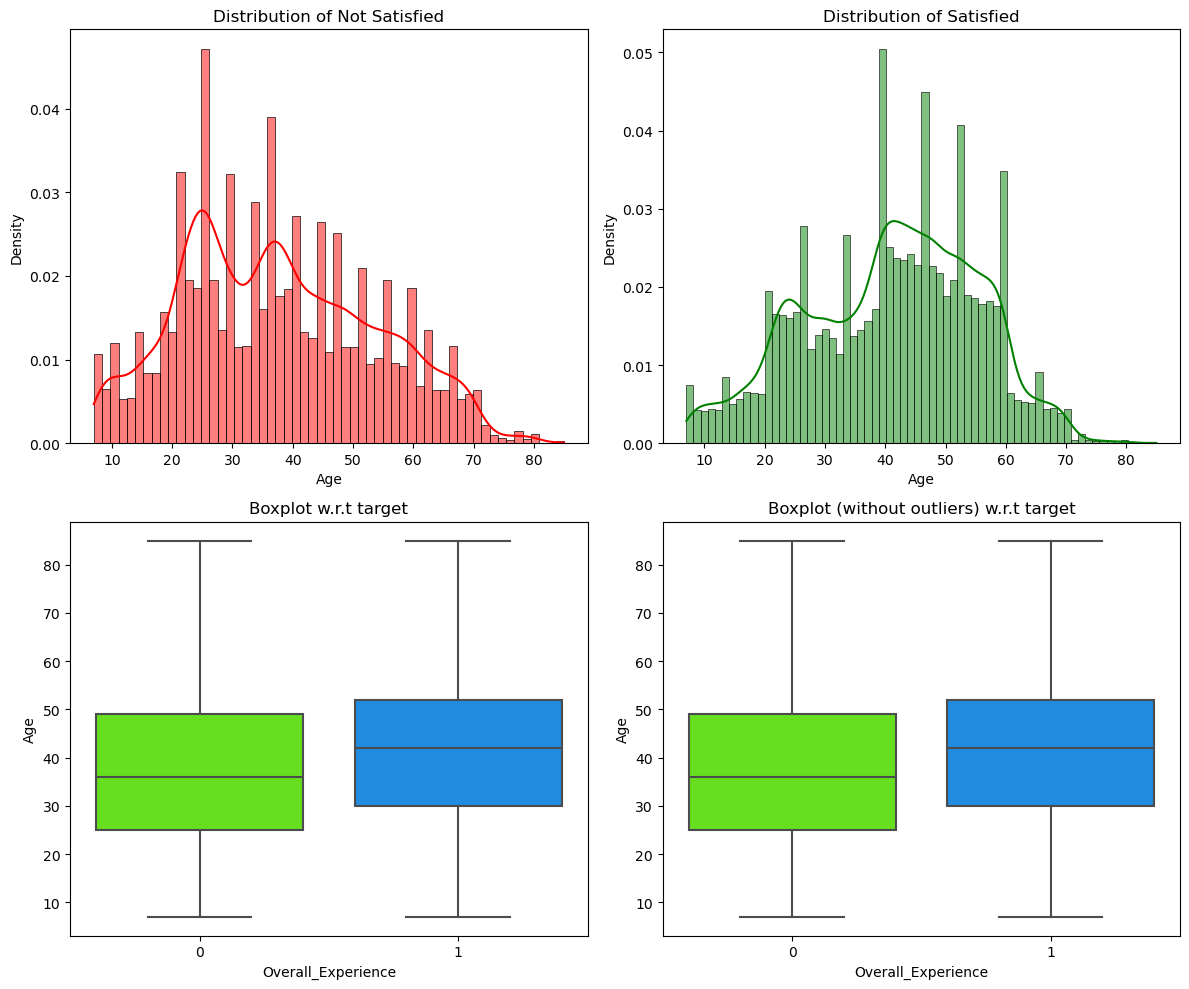

In [ ]:
distribution_plot_wrt_target(df, "Age", "Overall_Experience")

### Observations on Overall Experience and Travel Type

In [ ]:
stacked_barplot(df, "Type_Travel", "Overall_Experience")

Overall_Experience      0      1    All
Type_Travel                            
All                 38600  46553  85153
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
------------------------------------------------------------------------------------------------------------------------


### Observations on Overall Experience and Travel Class

Overall_Experience      0      1    All
Travel_Class                           
All                 42786  51593  94379
Eco                 29644  19698  49342
Business            13142  31895  45037
------------------------------------------------------------------------------------------------------------------------


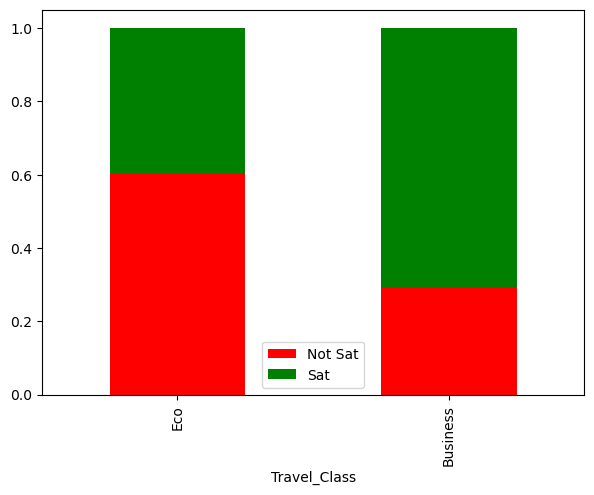

In [ ]:
stacked_barplot(df, "Travel_Class", "Overall_Experience")

### Observations on Overall Experience and Travel Distance

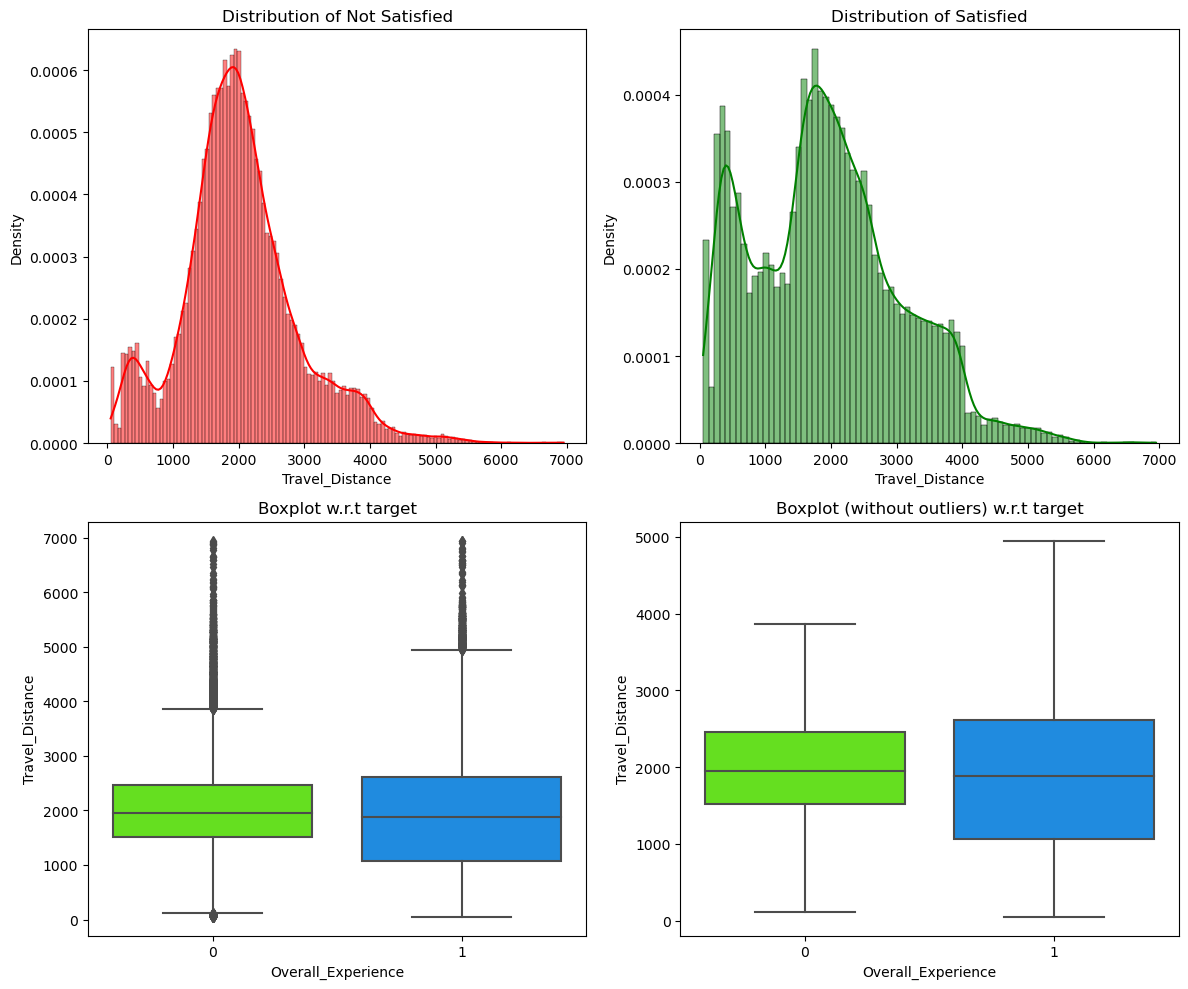

In [ ]:
distribution_plot_wrt_target(df, "Travel_Distance", "Overall_Experience")

### Observations on Overall Experience and Departure Delay

In [ ]:
distribution_plot_wrt_target(df, "Departure_Delay_in_Mins", "Overall_Experience")

### Observations on Overall Experience and Arrival Delay

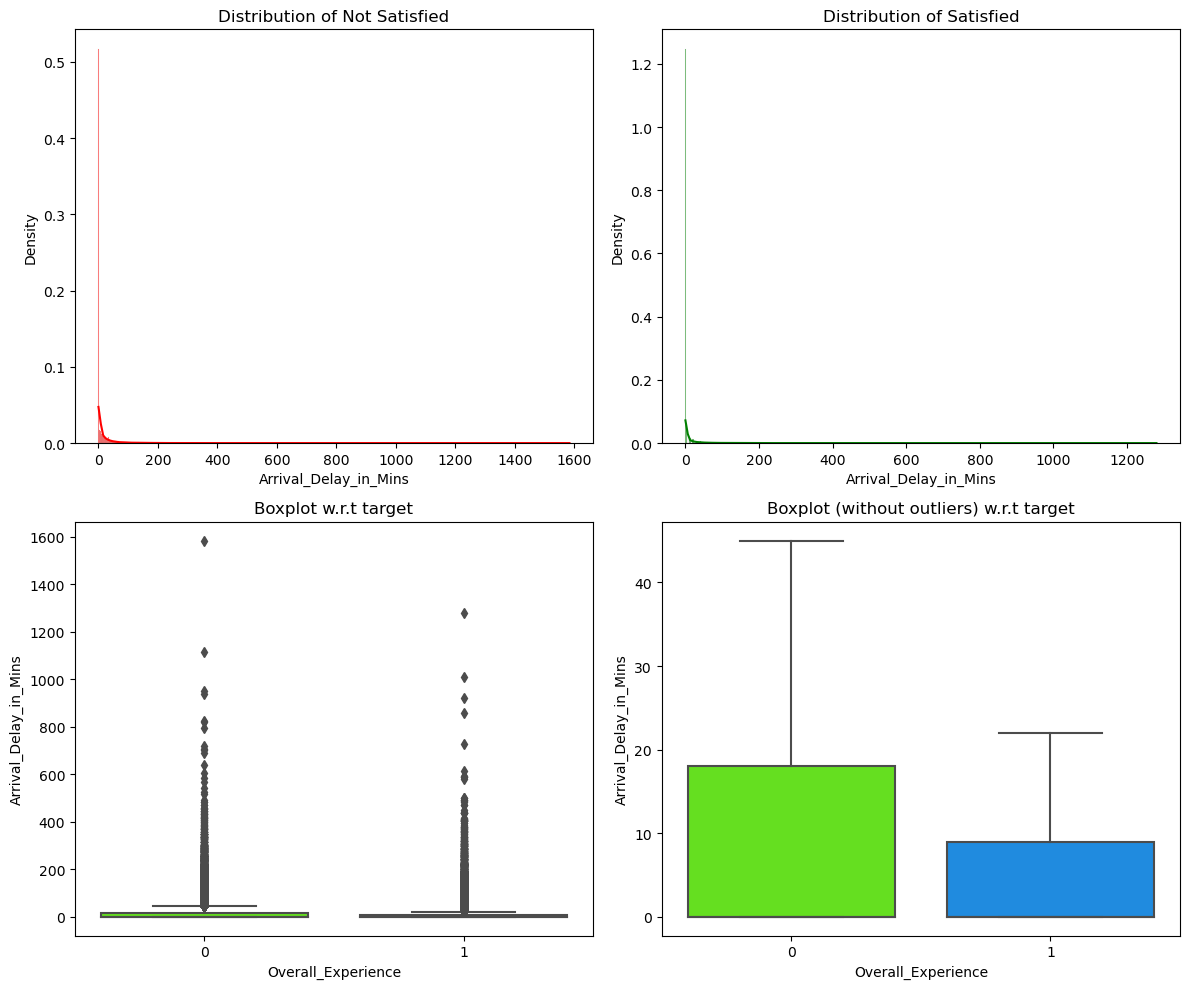

In [ ]:
distribution_plot_wrt_target(df, "Arrival_Delay_in_Mins", "Overall_Experience")

### Observations on Overall Experience and Platform Location

Overall_Experience      0      1    All
Platform_Location                      
All                 42773  51576  94349
Manageable          12985  11188  24173
Convenient          11009  10903  21912
Needs Improvement    7504  10328  17832
Inconvenient         6422  10027  16449
Very Convenient      4853   9128  13981
Very Inconvenient       0      2      2
------------------------------------------------------------------------------------------------------------------------


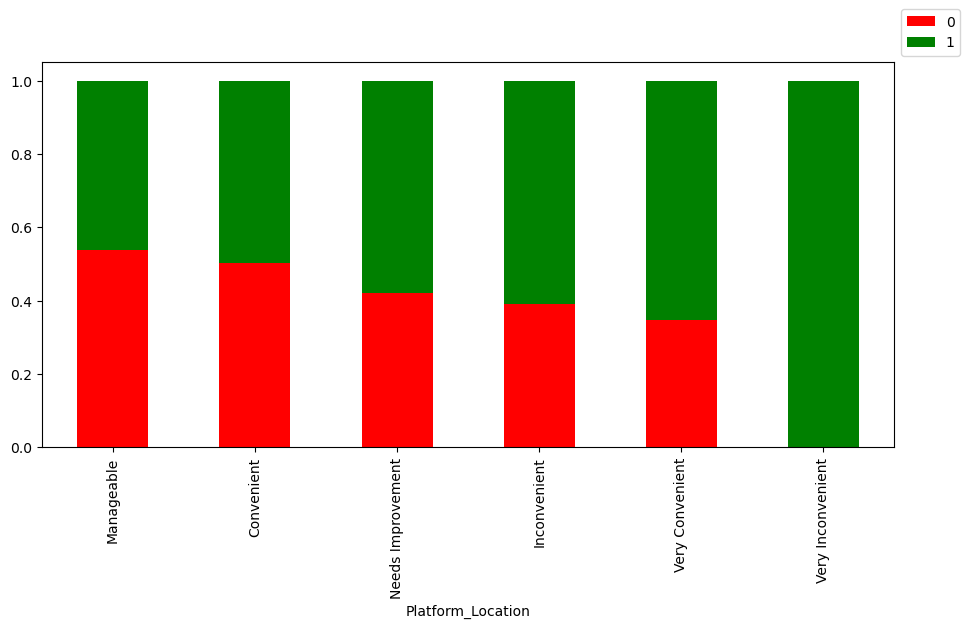

In [ ]:
stacked_barplot(df, "Platform_Location", "Overall_Experience")

In [ ]:
# Print rows where Platform_Location = "Very Incovenient"
filtered_df = df[df['Platform_Location'] == 'Very Inconvenient']
print(filtered_df)

       Overall_Experience Seat_Comfort Seat_Class Arrival_Time_Convenient  \
49219                   1         Poor   Ordinary          Extremely Poor   
79337                   1         Poor  Green Car          Extremely Poor   

        Catering  Platform_Location Onboard_Wifi_Service  \
49219  Excellent  Very Inconvenient                 Good   
79337  Excellent  Very Inconvenient                 Good   

      Onboard_Entertainment Online_Support Ease_of_Online_Booking  \
49219                  Good           Good                   Poor   
79337                  Good           Good                   Poor   

      Onboard_Service Legroom Baggage_Handling CheckIn_Service Cleanliness  \
49219            Poor    Poor             Poor      Acceptable        Poor   
79337            Poor    Poor             Poor      Acceptable        Poor   

      Online_Boarding  Gender   Customer_Type      Age      Type_Travel  \
49219            Good  Female  Loyal Customer 40.00000  Personal Trav

### Observations on Overall Experience and Seat Class

Overall_Experience      0      1    All
Seat_Class                             
All                 42786  51593  94379
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
------------------------------------------------------------------------------------------------------------------------


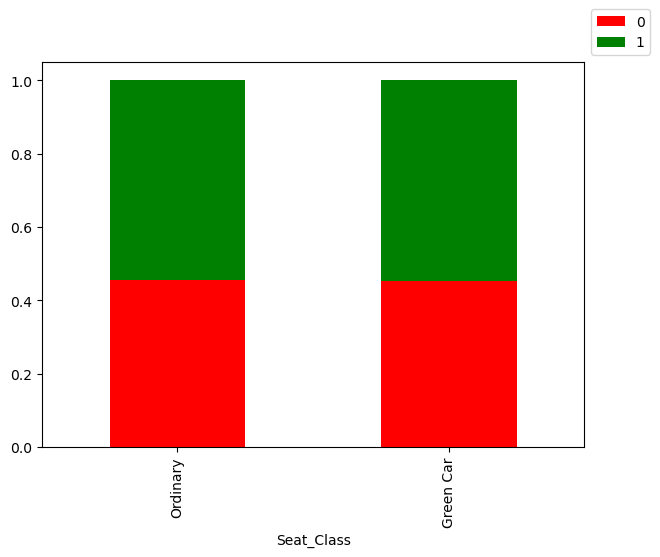

In [ ]:
stacked_barplot(df, "Seat_Class", "Overall_Experience")

### Observations on Overall Experience and Seat Comfort

Overall_Experience      0      1    All
Seat_Comfort                           
All                 42757  51561  94318
Acceptable          13669   7489  21158
Needs Improvement   13464   7482  20946
Poor                 8339   6846  15185
Good                 7181  13414  20595
Excellent              96  12875  12971
Extremely Poor          8   3455   3463
------------------------------------------------------------------------------------------------------------------------


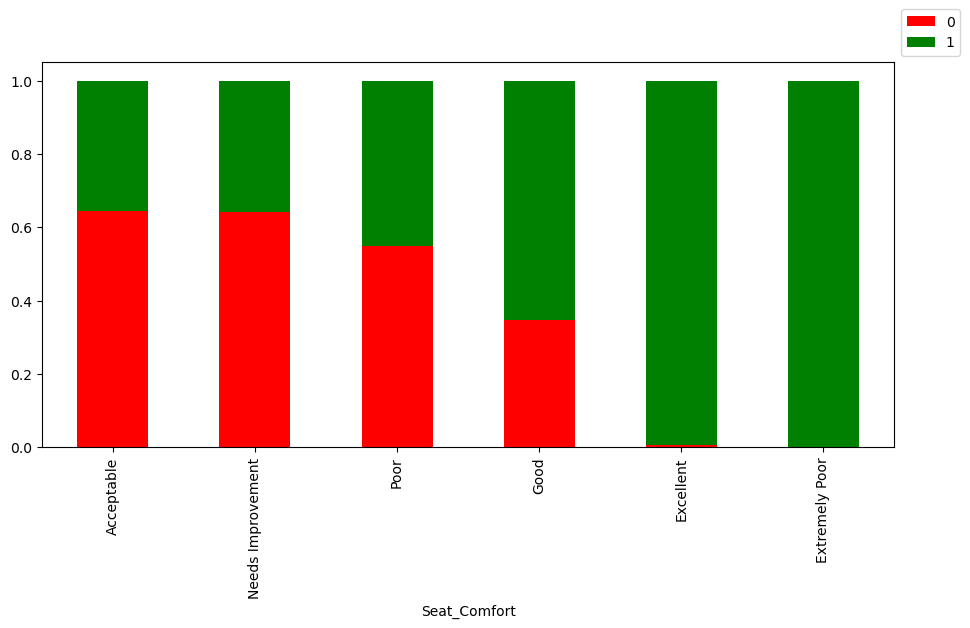

In [ ]:
stacked_barplot(df, "Seat_Comfort", "Overall_Experience")

### Observations on Overall Experience and Arrival Time Convenient

Overall_Experience           0      1    All
Arrival_Time_Convenient                     
All                      38794  46655  85449
Good                      9307  10267  19574
Excellent                 7866   9818  17684
Acceptable                7050   8127  15177
Needs Improvement         6952   8038  14990
Poor                      5638   8054  13692
Extremely Poor            1981   2351   4332
------------------------------------------------------------------------------------------------------------------------


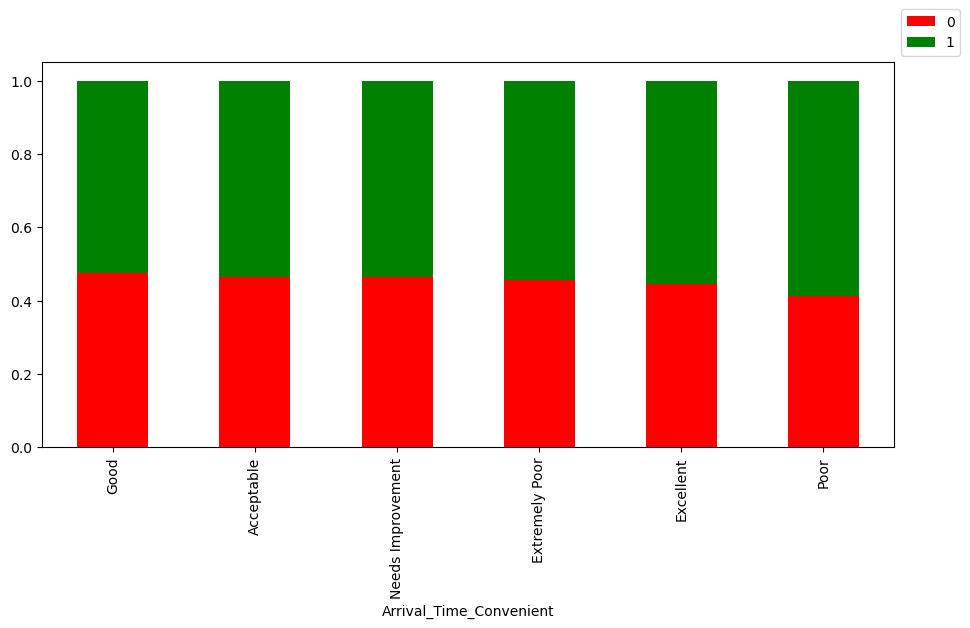

In [ ]:
stacked_barplot(df, "Arrival_Time_Convenient", "Overall_Experience")

### Observations on Overall Experience and Catering

Overall_Experience      0      1    All
Catering                               
All                 38839  46799  85638
Acceptable          10574   7894  18468
Needs Improvement   10226   7752  17978
Good                 7401  10568  17969
Poor                 6814   7044  13858
Excellent            2945  10510  13455
Extremely Poor        879   3031   3910
------------------------------------------------------------------------------------------------------------------------


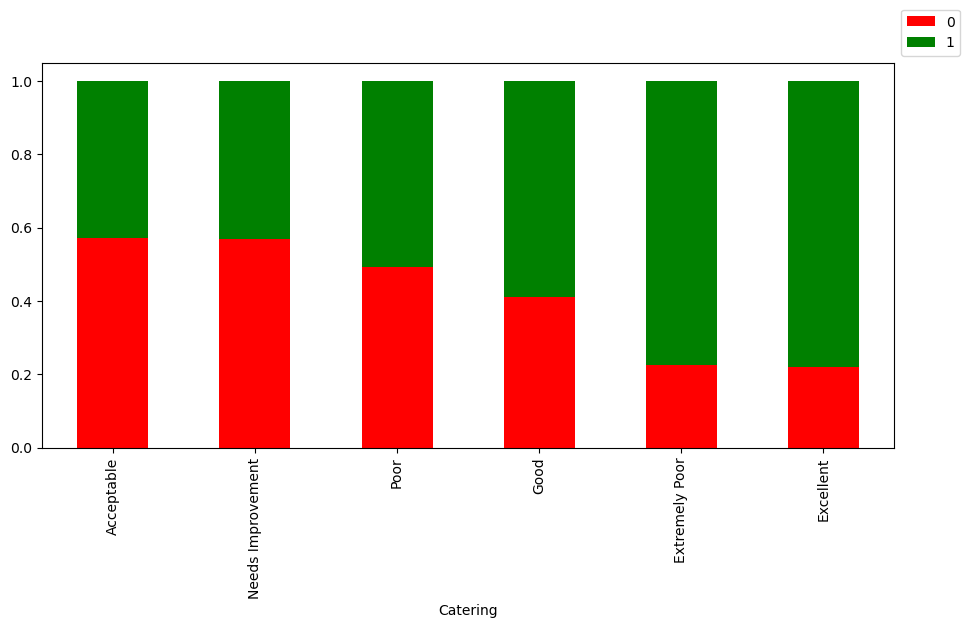

In [ ]:
stacked_barplot(df, "Catering", "Overall_Experience")

### Observations on Overall Experience and Onboard Wifi Service

Overall_Experience        0      1    All
Onboard_Wifi_Service                     
All                   42773  51576  94349
Acceptable             9857  10261  20118
Needs Improvement      9767   9829  19596
Good                   8235  14600  22835
Poor                   7908   2833  10741
Excellent              6950  14018  20968
Extremely Poor           56     35     91
------------------------------------------------------------------------------------------------------------------------


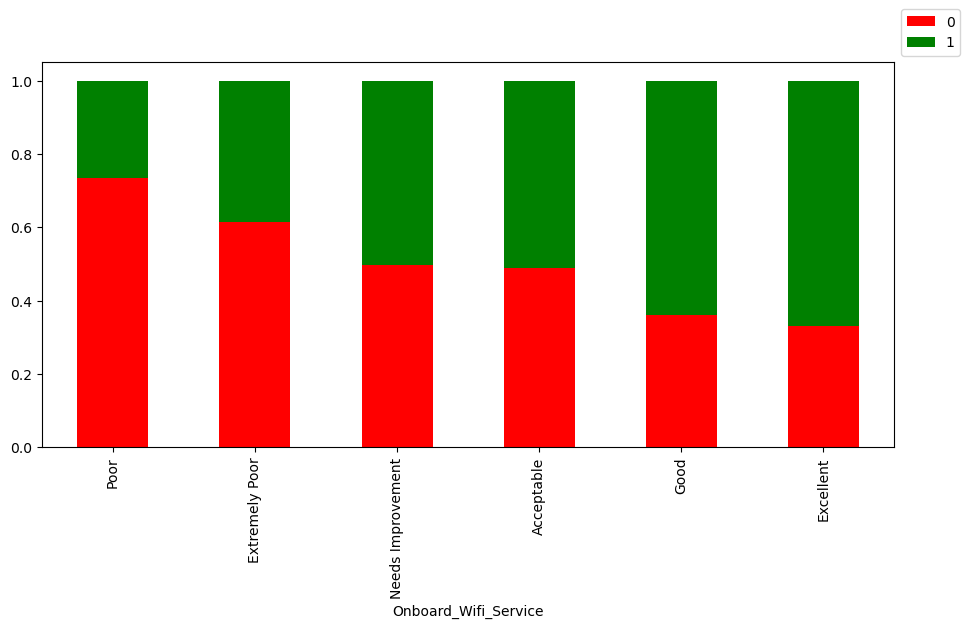

In [ ]:
stacked_barplot(df, "Onboard_Wifi_Service", "Overall_Experience")

### Observations on Overall Experience and Onboard Entertainment

Overall_Experience         0      1    All
Onboard_Entertainment                     
All                    42778  51583  94361
Acceptable             14075   3485  17560
Needs Improvement      11589   2337  13926
Good                    8548  21898  30446
Poor                    6805   1836   8641
Excellent               1022  20622  21644
Extremely Poor           739   1405   2144
------------------------------------------------------------------------------------------------------------------------


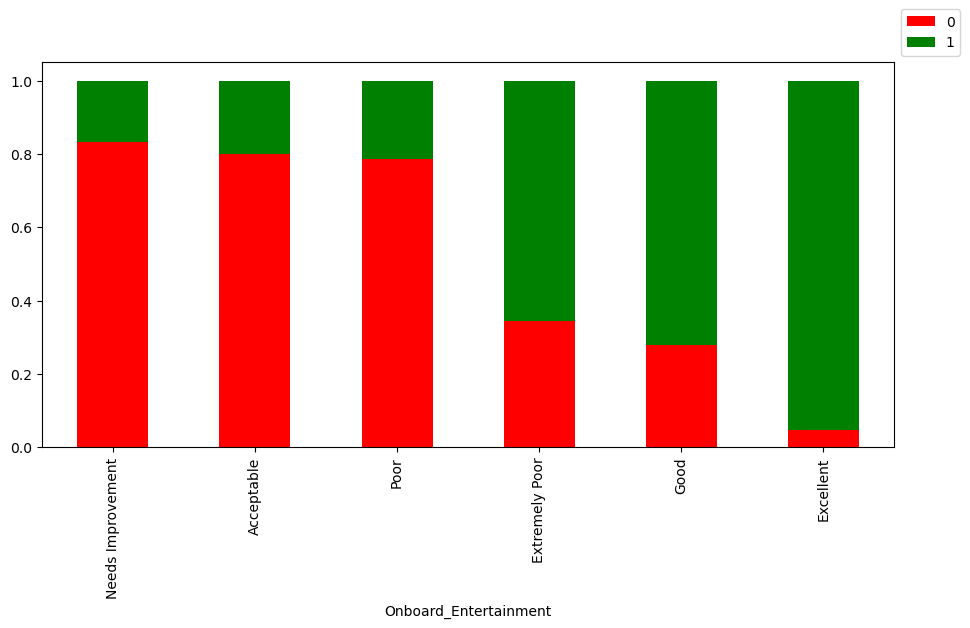

In [ ]:
stacked_barplot(df, "Onboard_Entertainment", "Overall_Experience")

### Observations on Overall Experience and Online Support

Overall_Experience      0      1    All
Online_Support                         
All                 42755  51533  94288
Acceptable          11300   4402  15702
Good                 9582  20434  30016
Needs Improvement    8790   3718  12508
Poor                 7205   2962  10167
Excellent            5877  20017  25894
Extremely Poor          1      0      1
------------------------------------------------------------------------------------------------------------------------


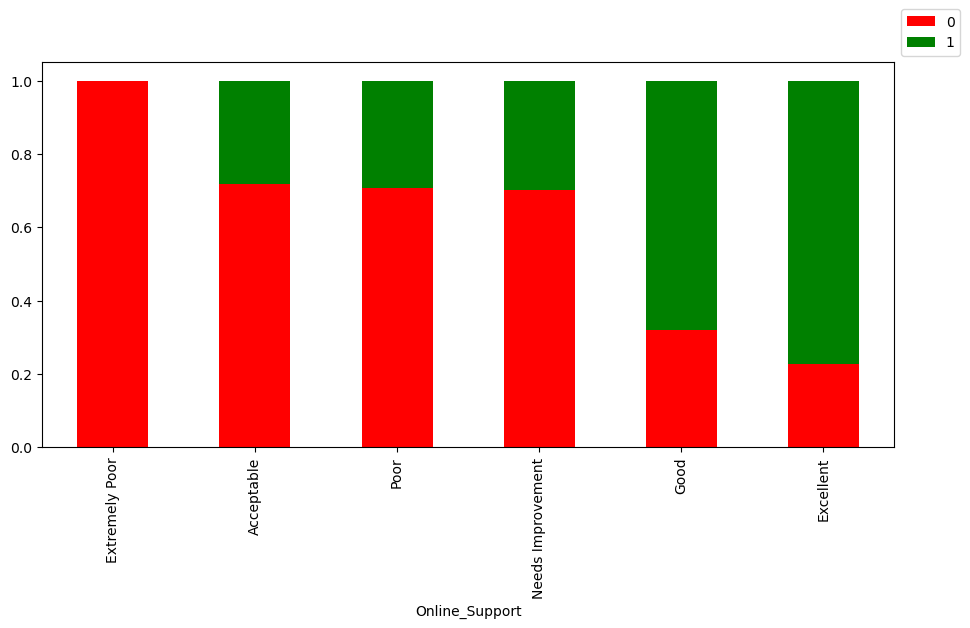

In [ ]:
stacked_barplot(df, "Online_Support", "Overall_Experience")

### Observations on Overall Experience and Ease of Online Booking

Overall_Experience          0      1    All
Ease_of_Online_Booking                     
All                     42763  51543  94306
Acceptable              10559   5831  16390
Needs Improvement       10347   4132  14479
Good                     8115  20794  28909
Poor                     7890   1878   9768
Excellent                5836  18908  24744
Extremely Poor             16      0     16
------------------------------------------------------------------------------------------------------------------------


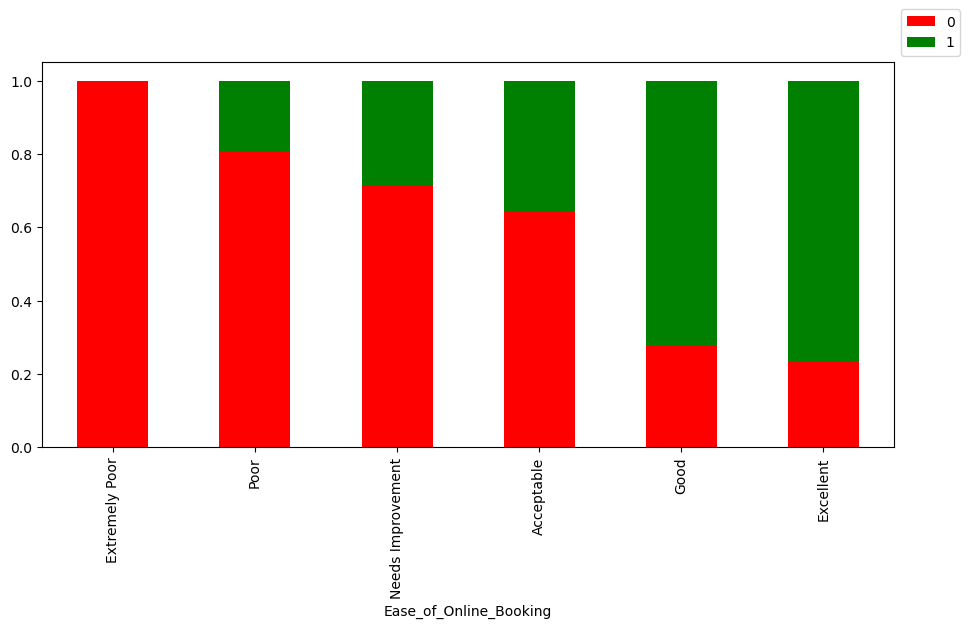

In [ ]:
stacked_barplot(df, "Ease_of_Online_Booking", "Overall_Experience")

### Observations on Overall Experience and Onboard Service

Overall_Experience      0      1    All
Onboard_Service                        
All                 39341  47437  86778
Acceptable          10708   7363  18071
Good                 9625  17640  27265
Needs Improvement    7547   3843  11390
Poor                 6425   2351   8776
Excellent            5032  16240  21272
Extremely Poor          4      0      4
------------------------------------------------------------------------------------------------------------------------


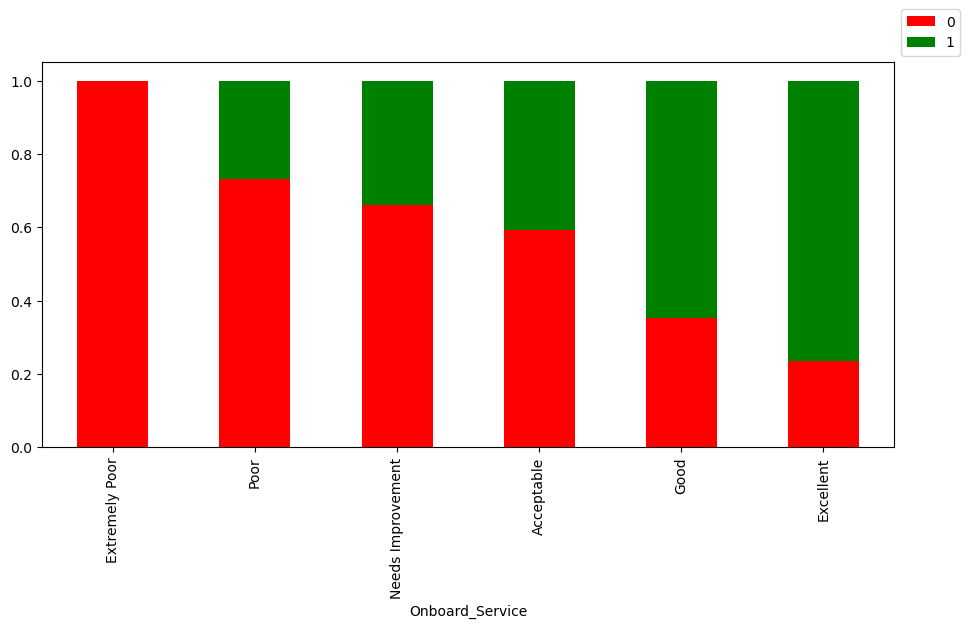

In [ ]:
stacked_barplot(df, "Onboard_Service", "Overall_Experience")

### Observations on Overall Experience and Legroom

Overall_Experience      0      1    All
Legroom                                
All                 42750  51539  94289
Acceptable          10321   6063  16384
Needs Improvement    9814   5939  15753
Good                 9488  19382  28870
Excellent            7245  17587  24832
Poor                 5776   2334   8110
Extremely Poor        106    234    340
------------------------------------------------------------------------------------------------------------------------


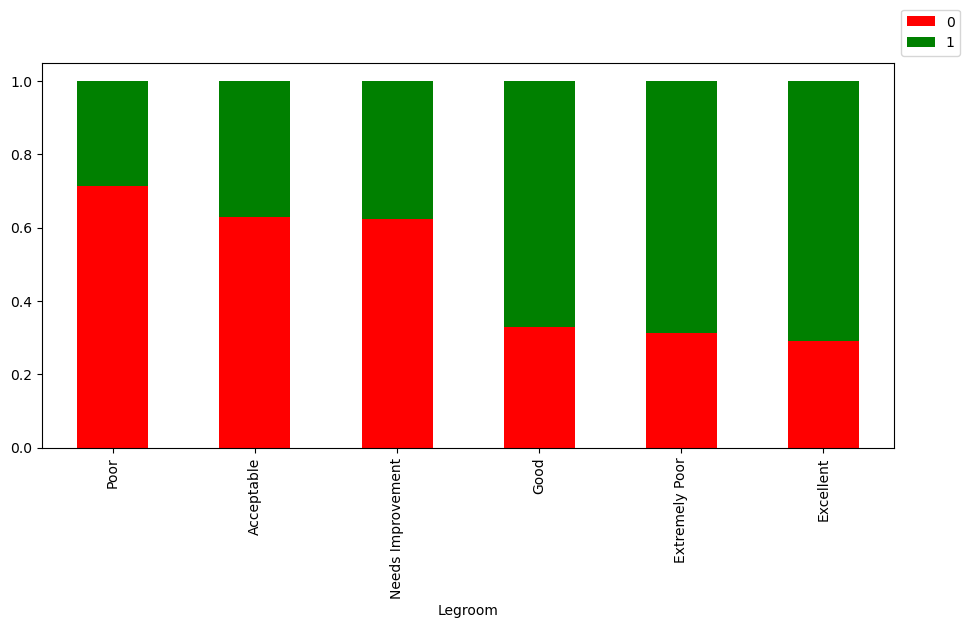

In [ ]:
stacked_barplot(df, "Legroom", "Overall_Experience")

### Observations on Overall Experience and Baggage Handling

Overall_Experience      0      1    All
Baggage_Handling                       
All                 42722  51515  94237
Good                14382  20562  34944
Acceptable          12205   5562  17767
Excellent            6949  19054  26003
Needs Improvement    5875   3884   9759
Poor                 3311   2453   5764
------------------------------------------------------------------------------------------------------------------------


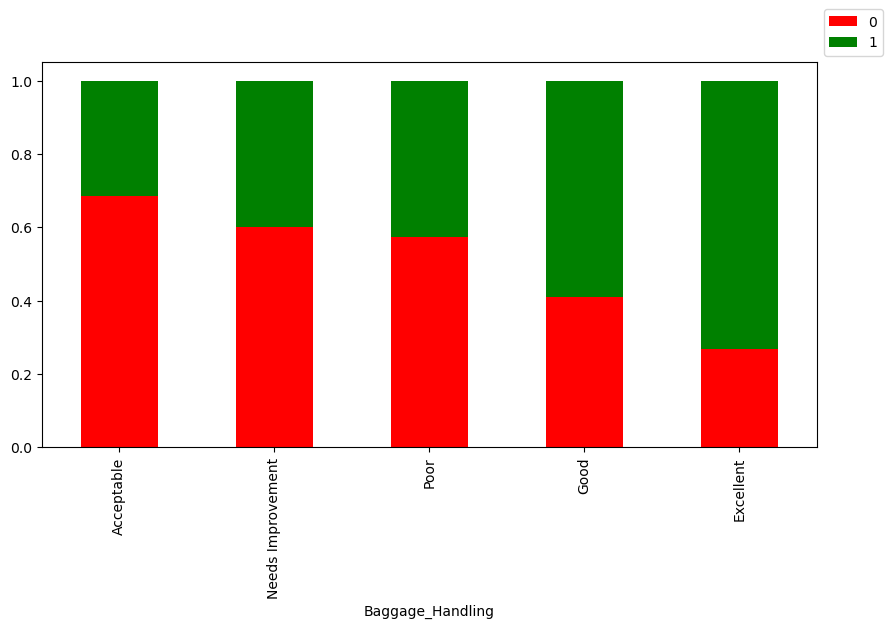

In [ ]:
stacked_barplot(df, "Baggage_Handling", "Overall_Experience")

### Observations on Overall Experience and CheckIn Service

Overall_Experience      0      1    All
CheckIn_Service                        
All                 42752  51550  94302
Good                11263  15239  26502
Acceptable          11194  14609  25803
Poor                 7574   3563  11137
Needs Improvement    7484   3734  11218
Excellent            5236  14405  19641
Extremely Poor          1      0      1
------------------------------------------------------------------------------------------------------------------------


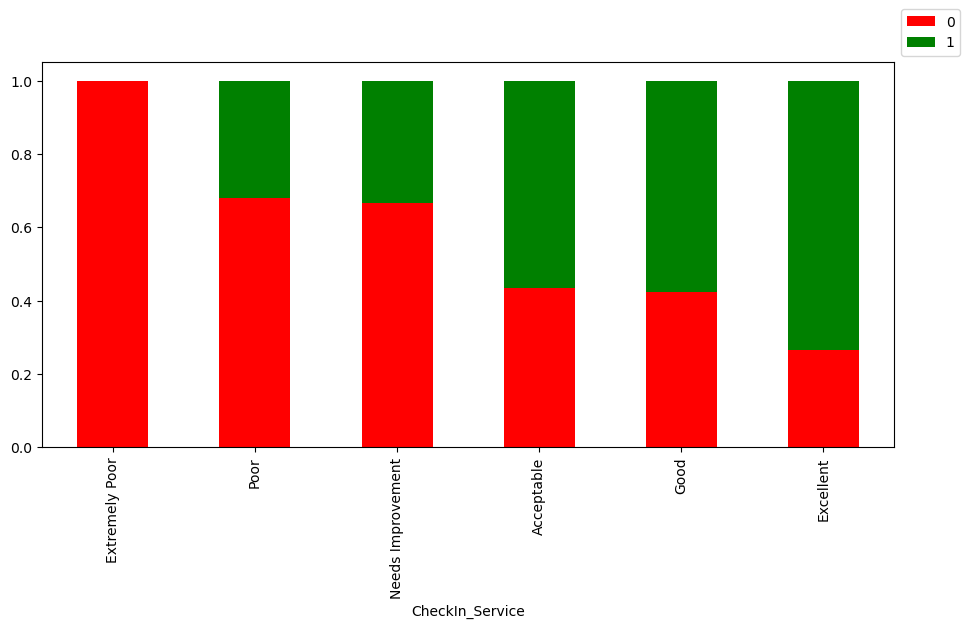

In [ ]:
stacked_barplot(df, "CheckIn_Service", "Overall_Experience")

### Observations on Overall Experience and Cleanliness

Overall_Experience      0      1    All
Cleanliness                            
All                 42786  51587  94373
Good                14678  20749  35427
Acceptable          11859   5590  17449
Excellent            7067  18986  26053
Needs Improvement    5849   3957   9806
Poor                 3328   2305   5633
Extremely Poor          5      0      5
------------------------------------------------------------------------------------------------------------------------


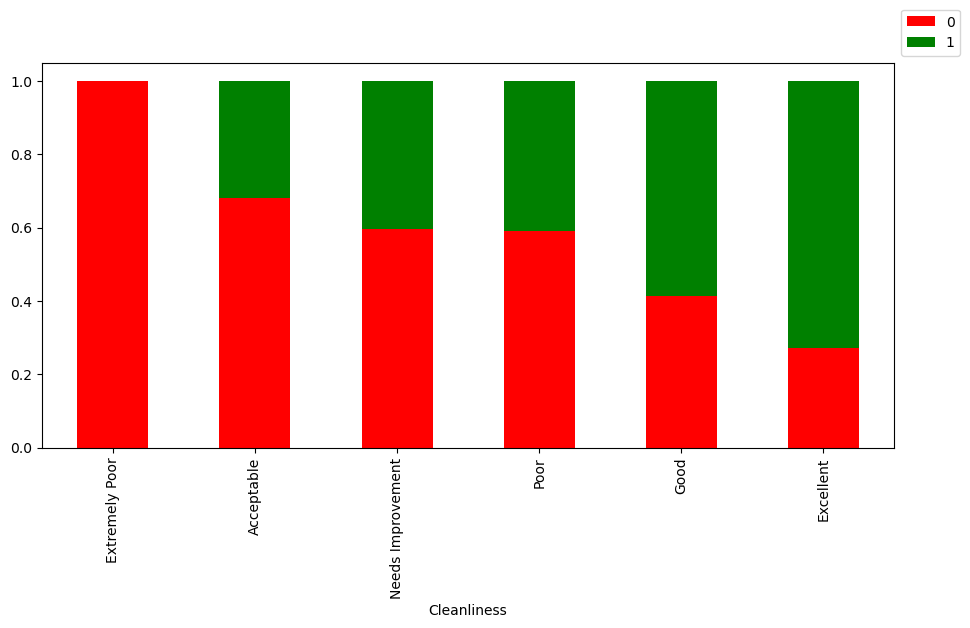

In [ ]:
stacked_barplot(df, "Cleanliness", "Overall_Experience")

### Observations on Overall Experience and Online Boarding

Overall_Experience      0      1    All
Online_Boarding                        
All                 42786  51587  94373
Acceptable          10125  12350  22475
Needs Improvement    9674   3777  13451
Good                 8869  16664  25533
Poor                 8249   2911  11160
Excellent            5857  15885  21742
Extremely Poor         12      0     12
------------------------------------------------------------------------------------------------------------------------


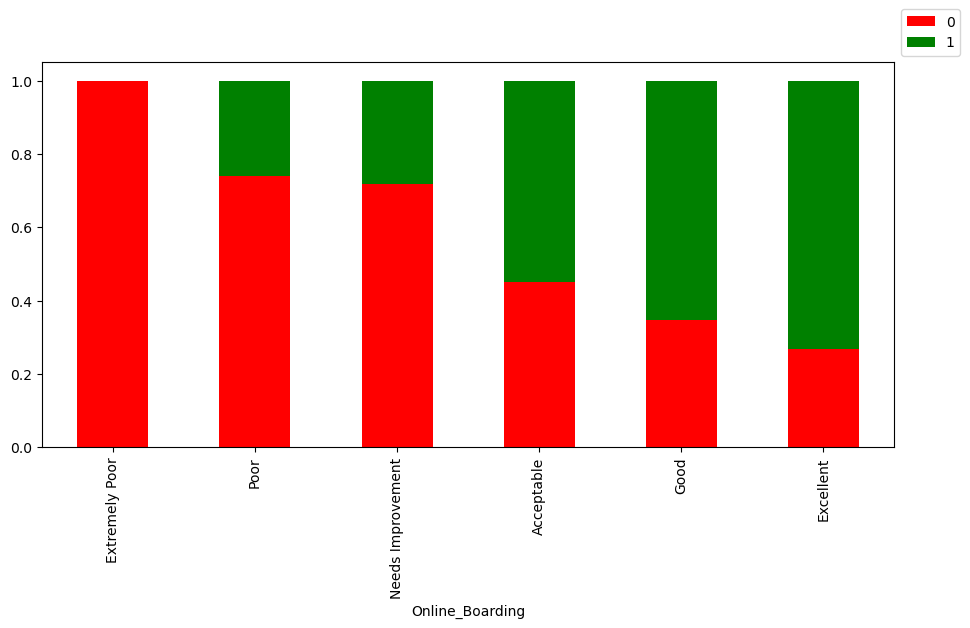

In [ ]:
stacked_barplot(df, "Online_Boarding", "Overall_Experience")

**Observations from Bivariate Analysis ______**

Now, let's check the correlation among different numerical variables.

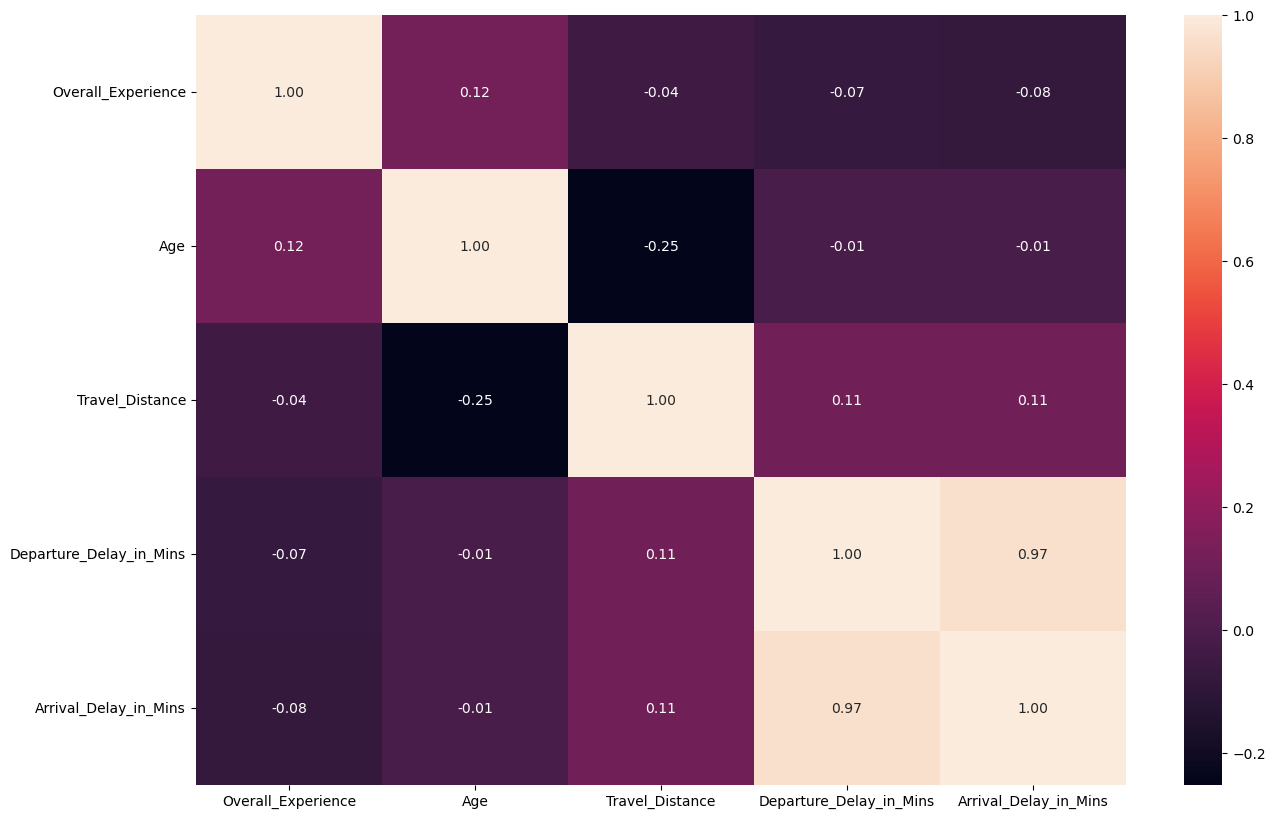

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

plt.show()

# Data Preprocessing

## Imputation

We shall fill the missing values with the mode for categorical data and the median for the Age:
- Seat_Comfort: Acceptable
- Arrival_Time_Convenient: Good
- Catering: Acceptable
- Platform_Location: Manageable
- Onboard_Wifi_Service: Good
- Onboard_Entertainment: Good
- Online_Support: Good
- Ease_of_Online_Booking: Good
- Onboard_Service: Good
- Legroom: Good
- Baggage_Handling: Good
- CheckIn_Service: Good
- Cleanliness: Good
- Online_Boarding: Good
- Gender: Female
- Customer_Type: Loyal Customer
- Age: 39
- Type_Travel: Business Travel
- Departure_Delay_in_Mins: 14
- Arrival_Delay_in_Mins: 15

In [ ]:
# Filling missing value for Age, Departure_Delay_in_Mins and Arrival_Delay_in_Mins using the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Departure_Delay_in_Mins'] = df['Departure_Delay_in_Mins'].fillna(df['Departure_Delay_in_Mins'].median())
df['Arrival_Delay_in_Mins'] = df['Arrival_Delay_in_Mins'].fillna(df['Arrival_Delay_in_Mins'].median())

# Filling missing other missing values using the mode of the column
df['Seat_Comfort'] = df['Seat_Comfort'].fillna('Acceptable')
df['Arrival_Time_Convenient'] = df['Arrival_Time_Convenient'].fillna('Good')
df['Catering'] = df['Catering'].fillna('Acceptable')
df['Platform_Location'] = df['Platform_Location'].fillna('Manageable')
df['Onboard_Wifi_Service'] = df['Onboard_Wifi_Service'].fillna('Good')
df['Onboard_Entertainment'] = df['Onboard_Entertainment'].fillna('Good')
df['Online_Support'] = df['Online_Support'].fillna('Good')
df['Ease_of_Online_Booking'] = df['Ease_of_Online_Booking'].fillna('Good')
df['Onboard_Service'] = df['Onboard_Service'].fillna('Good')
df['Legroom'] = df['Legroom'].fillna('Good')
df['Baggage_Handling'] = df['Baggage_Handling'].fillna('Good')
df['CheckIn_Service'] = df['CheckIn_Service'].fillna('Good')
df['Cleanliness'] = df['Cleanliness'].fillna('Good')
df['Online_Boarding'] = df['Online_Boarding'].fillna('Good')
df['Gender'] = df['Gender'].fillna('Female')
df['Customer_Type'] = df['Customer_Type'].fillna('Loyal Customer')
df['Type_Travel'] = df['Type_Travel'].fillna('Business Travel')

In [ ]:
# let's check that there are no missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

# Check for NaN values
#has_nan = df.isna().any().any()
#print(has_nan)

Overall_Experience        0.00000
Seat_Comfort              0.00000
Seat_Class                0.00000
Arrival_Time_Convenient   0.00000
Catering                  0.00000
Platform_Location         0.00000
Onboard_Wifi_Service      0.00000
Onboard_Entertainment     0.00000
Online_Support            0.00000
Ease_of_Online_Booking    0.00000
Onboard_Service           0.00000
Legroom                   0.00000
Baggage_Handling          0.00000
CheckIn_Service           0.00000
Cleanliness               0.00000
Online_Boarding           0.00000
Gender                    0.00000
Customer_Type             0.00000
Age                       0.00000
Type_Travel               0.00000
Travel_Class              0.00000
Travel_Distance           0.00000
Departure_Delay_in_Mins   0.00000
Arrival_Delay_in_Mins     0.00000
dtype: float64

### Data Preparation for modeling

- We want to predict the overall experience of the passenger: Satisfied (1) or Not Satisfied (0).
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

## Encoding Categorical Variables

In [ ]:
mapping_gender = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(mapping_gender)

mapping_customer_type = {'Loyal Customer': 0, 'Disloyal Customer': 1}
df['Customer_Type'] = df['Customer_Type'].map(mapping_customer_type)

mapping_type_travel = {'Personal Travel': 0, 'Business Travel': 1}
df['Type_Travel'] = df['Type_Travel'].map(mapping_type_travel)

mapping_travel_class = {'Business': 0, 'Eco': 1}
df['Travel_Class'] = df['Travel_Class'].map(mapping_travel_class)

mapping_platform_loc = {'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5}
df['Platform_Location'] = df['Platform_Location'].map(mapping_platform_loc)

mapping_seat_class = {'Ordinary': 0, 'Green Car': 1}
df['Seat_Class'] = df['Seat_Class'].map(mapping_seat_class)

mapping = {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5}
df['Seat_Comfort'] = df['Seat_Comfort'].map(mapping)
df['Arrival_Time_Convenient'] = df['Arrival_Time_Convenient'].map(mapping)
df['Catering'] = df['Catering'].map(mapping)
df['Onboard_Wifi_Service'] = df['Onboard_Wifi_Service'].map(mapping)
df['Onboard_Entertainment'] = df['Onboard_Entertainment'].map(mapping)
df['Online_Support'] = df['Online_Support'].map(mapping)
df['Ease_of_Online_Booking'] = df['Ease_of_Online_Booking'].map(mapping)
df['Onboard_Service'] = df['Onboard_Service'].map(mapping)
df['Legroom'] = df['Legroom'].map(mapping)
df['Baggage_Handling'] = df['Baggage_Handling'].map(mapping)
df['CheckIn_Service'] = df['CheckIn_Service'].map(mapping)
df['Cleanliness'] = df['Cleanliness'].map(mapping)
df['Online_Boarding'] = df['Online_Boarding'].map(mapping)


Now, let's look again the correlation among different numerical variables now that we have encoded the data.

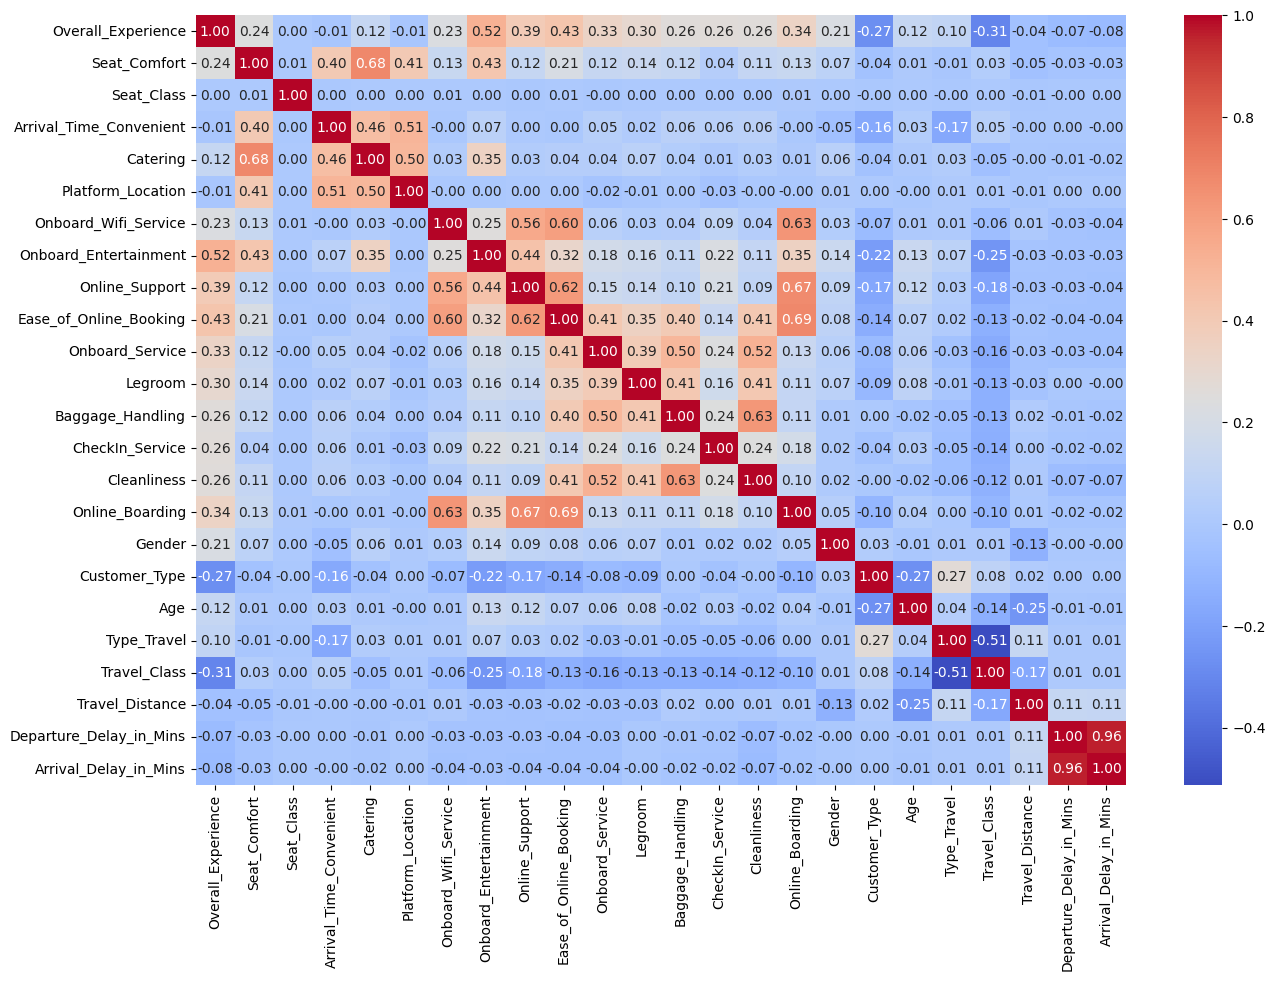

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f', cmap='coolwarm')

plt.show()

**Observations:**

We observe a slight correlation between:
- Catering and Seat Comfort (0.68)
- Online boarding with Online_Wifi_Service (0.63)
- Online boarding with Online_Support (0.67)
- Online boarding with Ease_of_Online_Booking (0.69)
- Cleanliness with Baggage_Handdling (0.63)

We observe a strong correlation between Departure_Delay_in_Mins and Arrival_Delay_in_Mins (0.96).


## Normalising Features

In [ ]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Splitting Data into Train and Test

In [ ]:
# Creating the copy of the dataframe
df_encoded = df.copy()


In [ ]:
# Separating features and the target column
X = df.drop(["Overall_Experience"], axis = 1)
y = df["Overall_Experience"]

In [ ]:
# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("----------------------------------------")
print("Percentage in training set:")
print(y_train.value_counts(normalize=True))
print("----------------------------------------")
print("Percentage in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (66065, 23)
Shape of Test set :  (28314, 23)
----------------------------------------
Percentage in training set:
1   0.54592
0   0.45408
Name: Overall_Experience, dtype: float64
----------------------------------------
Percentage in test set:
1   0.54839
0   0.45161
Name: Overall_Experience, dtype: float64


## **Building Classification Models**

### Model evaluation criterion


Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## 1. Decision Tree

### Building a Decision Tree Model

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Checking model performance on training set

In [ ]:
# Making predictions on the training data
y_pred_train1 = d_tree.predict(X_train)

# Calculate accuracy
train_acc1 = accuracy_score(y_train, y_pred_train1)

# Print accuracy
print("Train Accuracy:", train_acc1)

Train Accuracy: 0.871248013320215


**Observations:_________**


**Let's check the performance on test data to see if the model is overfitting.**

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

# Calculate accuracy
test_acc1 = accuracy_score(y_test, y_pred_test1)

# Print accuracy
print("Test Accuracy:", test_acc1)

Test Accuracy: 0.8693579148124603


**Observations:_________**

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**


In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

# Calculate accuracy
train_acc2 = accuracy_score(y_train, y_pred_train2)

# Print accuracy
print("Train Accuracy:", train_acc2)

Train Accuracy: 0.9204873987739347


**Observations:**

We improved the training accuracy from 87% to 92% by tuning our Decision Tree.

**Let's check the model performance on the testing data**

In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

# Calculate accuracy
test_acc2 = accuracy_score(y_test, y_pred_test2)

# Print accuracy
print("Test Accuracy:", test_acc2)

Test Accuracy: 0.9156954156954157


**Observations:**

We improved the test accuracy from 86% to 91% by tuning our Decision Tree.

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

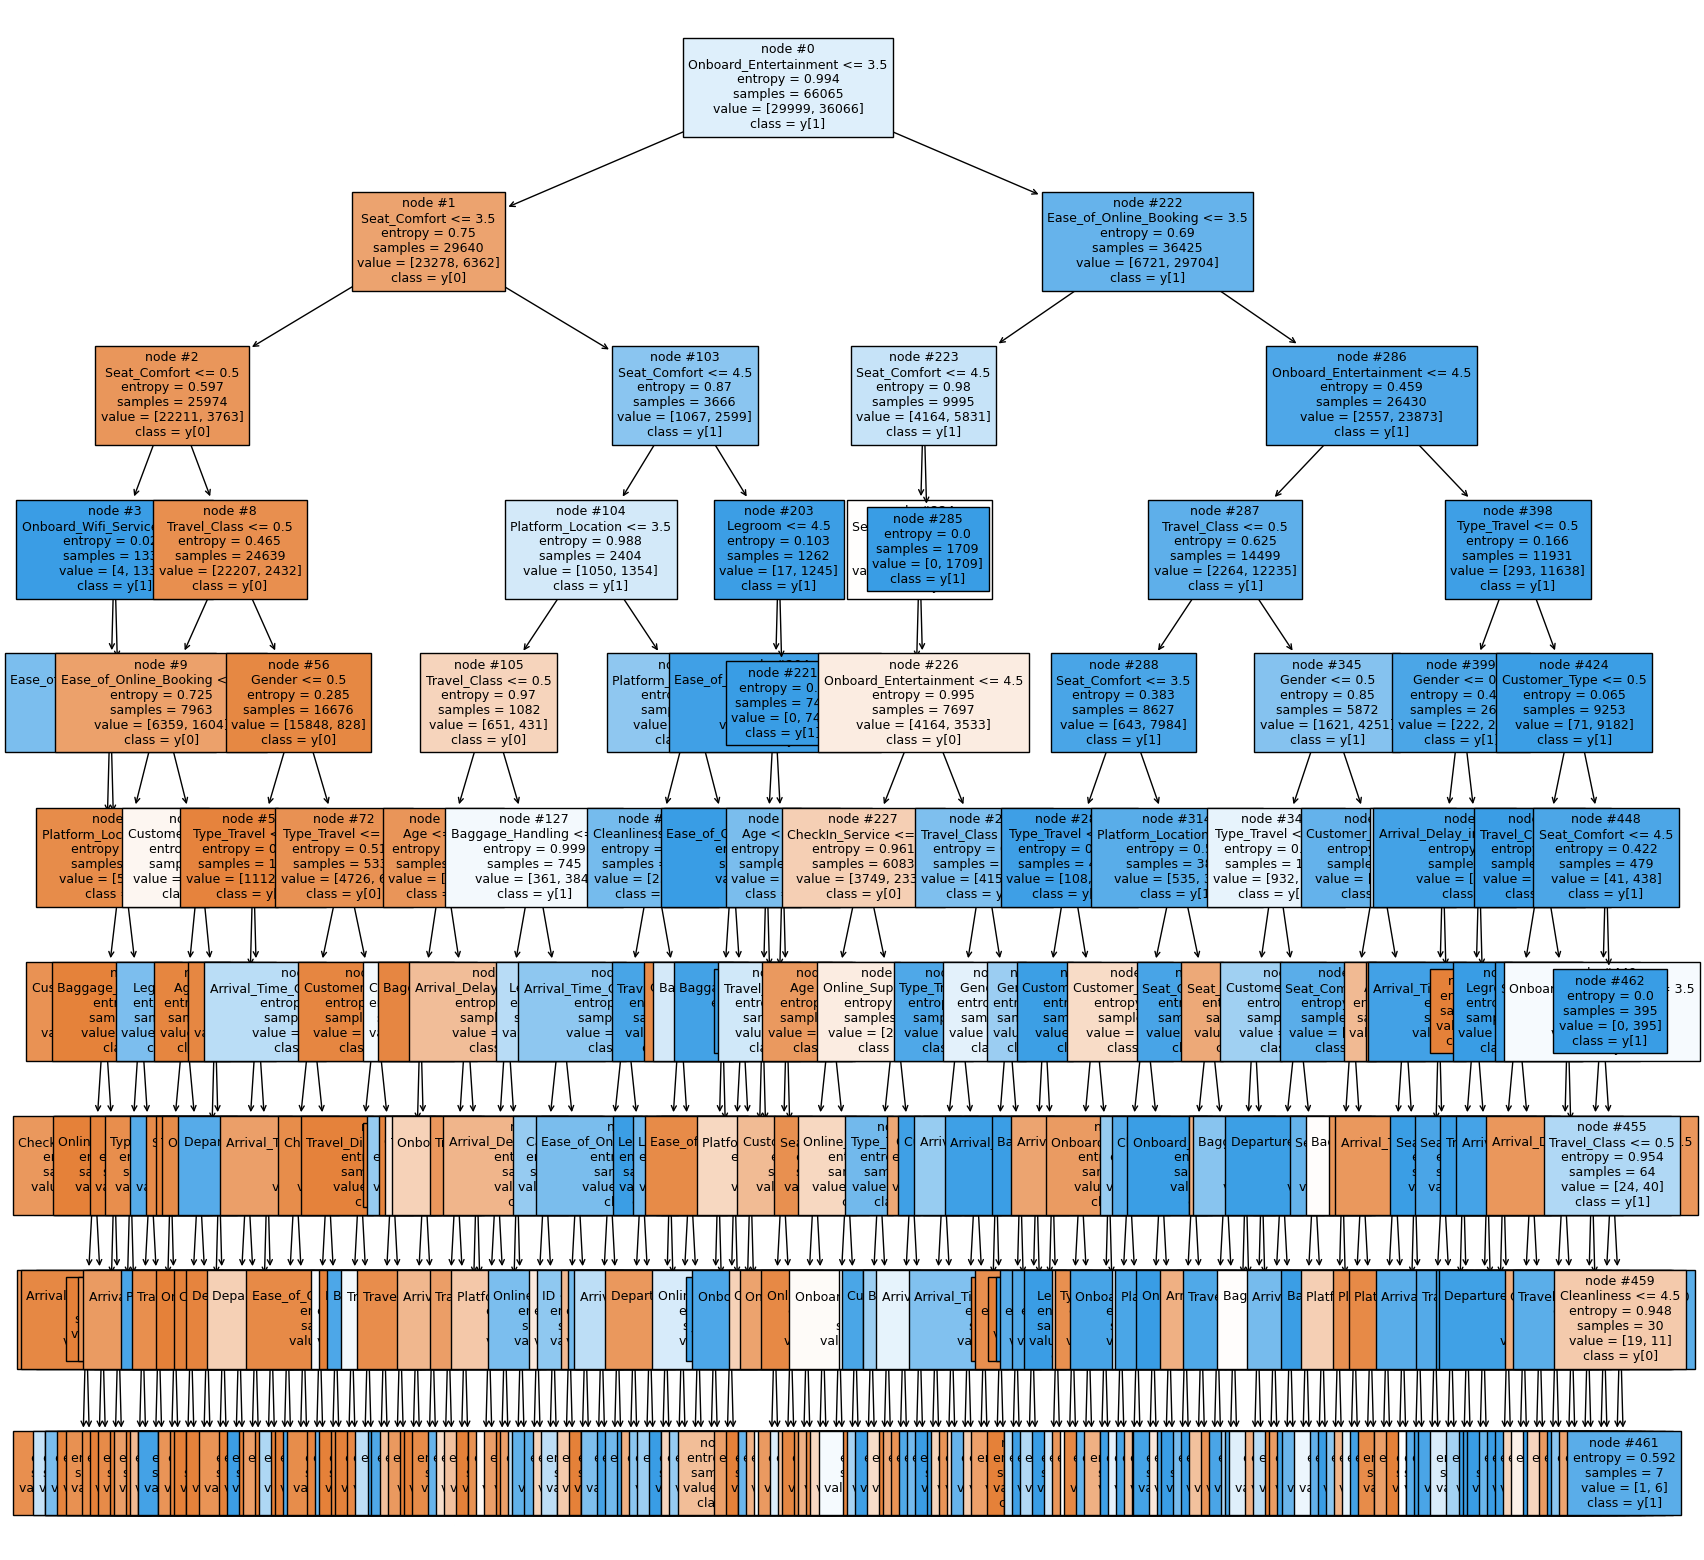

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the Satisfied passengers, i.e., **y[1]**, while the orange leaves represent the Not Satisfied passengers, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:_________**

**Let's look at the feature importance** of the tuned decision tree model

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Onboard_Entertainment   0.39822
Seat_Comfort            0.23951
Ease_of_Online_Booking  0.08909
Type_Travel             0.04333
Travel_Class            0.04281
Customer_Type           0.04223
Gender                  0.02617
Platform_Location       0.02513
Age                     0.01583
CheckIn_Service         0.01487
Arrival_Time_Convenient 0.01222
Legroom                 0.01173
Baggage_Handling        0.00630
Online_Support          0.00607
Cleanliness             0.00603
Departure_Delay_in_Mins 0.00562
Arrival_Delay_in_Mins   0.00396
Online_Boarding         0.00245
Onboard_Wifi_Service    0.00245
Catering                0.00206
Travel_Distance         0.00202
Onboard_Service         0.00103
ID                      0.00086
Seat_Class              0.00000


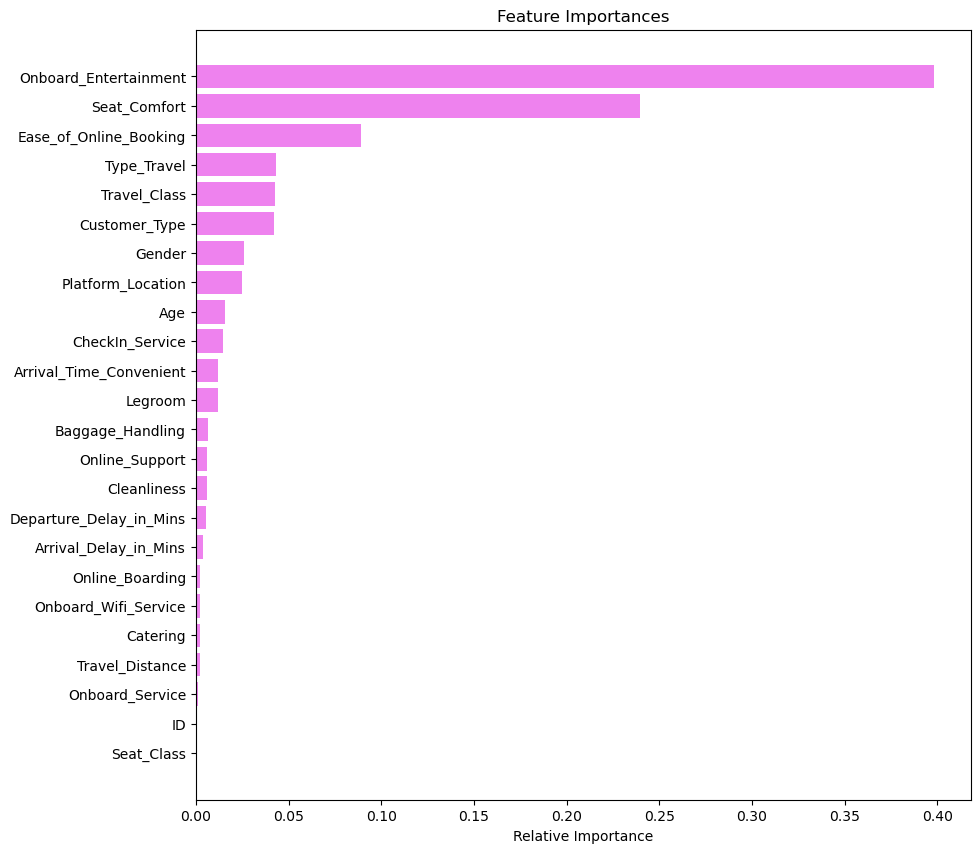

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **The Onboard Entertainment and Seat Comfort are the most important features** **followed by Ease of Online Booking**.
- **The rest of the variables have little or no impact in this model, while deciding whether a passenger will be overall Satisfied or not**.

Now, let's build another model - **a random forest classifier.**

## 2. Random Forest

### Building a Random Forest Model

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = 25)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=25,
                       random_state=0)

**Let's check the performance of the model on the training data**

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

# Calculate accuracy
train_acc3 = accuracy_score(y_train, y_pred_train3)

# Print accuracy
print("Train Accuracy:", train_acc3)

Train Accuracy: 0.9228487096041778


**Observations:**

The Random Forest model has a similar performance than our tuned Decision Tree classifier.

**Let's check the performance on the testing data**

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

# Calculate accuracy
test_acc3 = accuracy_score(y_test, y_pred_test3)

# Print accuracy
print("Test Accuracy:", test_acc3)

Test Accuracy: 0.9174260083350992


**Observations:**

The Random Forest model has a similar performance than our tuned Decision Tree classifier.

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**.

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [25, 50, 100],
    "max_depth": [8, 9],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=0.8,
                       max_samples=0.9, min_samples_leaf=20, n_estimators=50,
                       random_state=7)

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

# Calculate accuracy
train_acc4 = accuracy_score(y_train, y_pred_train4)

# Print accuracy
print("Train Accuracy:", train_acc4)

Train Accuracy: 0.9332021493983198


**Observations:________**

**Let's check the model performance on the test data**

In [ ]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

# Calculate accuracy
test_acc4 = accuracy_score(y_test, y_pred_test4)

# Print accuracy
print("Test Accuracy:", test_acc4)

Test Accuracy: 0.9299286572013845


**Observations:___________**

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

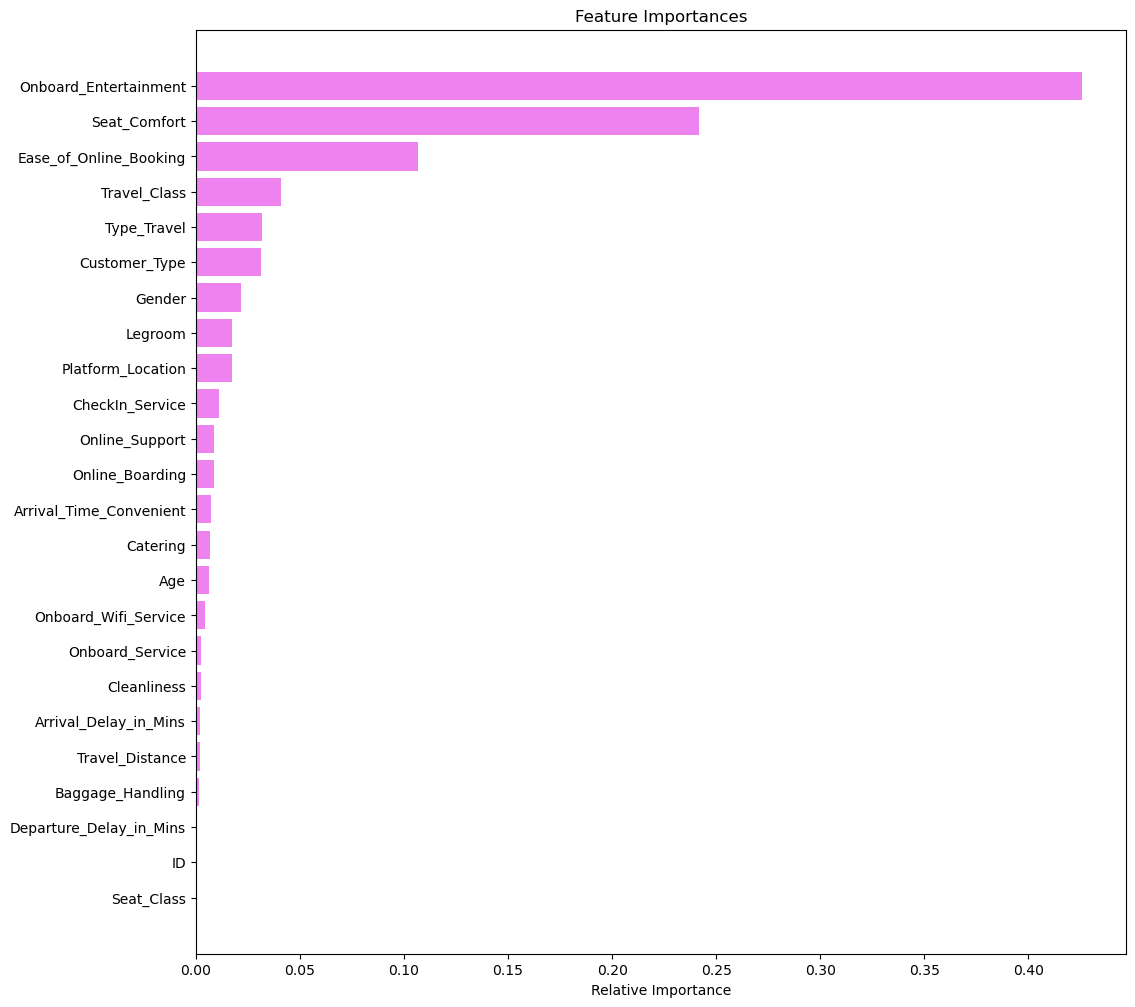

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**


## 3. Logistic Regression

### Building a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Checking performance on the training data
y_pred_train5 = logreg.predict(X_train)

# Calculate accuracy
train_acc5 = accuracy_score(y_train, y_pred_train5)

# Print accuracy
print("Train Accuracy:", train_acc5)

Train Accuracy: 0.5459169000227049


In [ ]:
# Checking performance on the test data
y_pred_test5 = logreg.predict(X_test)

# Calculate accuracy
test_acc5 = accuracy_score(y_test, y_pred_test5)

# Print accuracy
print("Test Accuracy:", test_acc5)

Test Accuracy: 0.5483859574768666


**Observations:**

Given the poor performance of the Logistic Regression model, let's perform PCA then run the logistic regression to see if we can improve the performance.

### **Principal Component Analysis**

In [ ]:
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

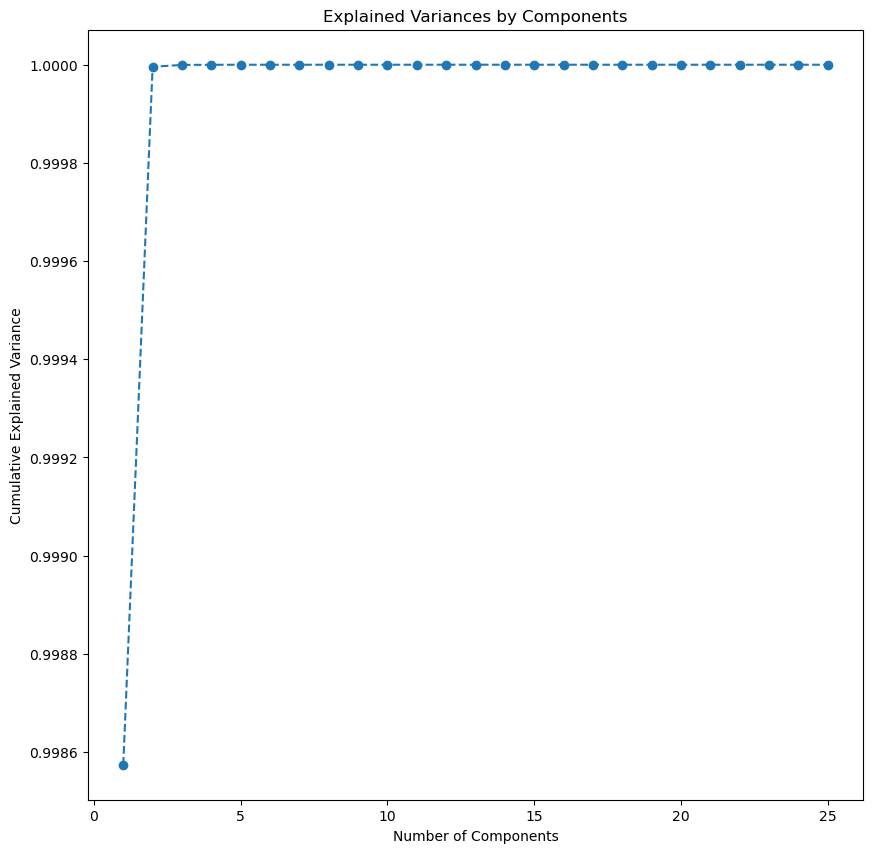

In [ ]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 10


In [ ]:
pc_comps = ['PC1','PC2','PC3', 'PC4','PC5','PC6','PC7', 'PC8','PC9','PC10']

data_pca = pd.DataFrame(np.round(pca.components_[:10,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

PC1      PC2      PC3      PC4      PC5      PC6  \
ID                       0.00000 -0.00000  0.00000  0.00000 -0.00000  0.00000   
Overall_Experience      -0.33000  0.04000  0.01000 -0.01000 -0.15000  0.23000   
Seat_Comfort            -0.20000 -0.46000  0.03000  0.01000 -0.04000 -0.06000   
Seat_Class              -0.00000 -0.00000  0.00000 -0.00000  0.01000  0.00000   
Arrival_Time_Convenient -0.07000 -0.46000 -0.04000  0.02000  0.12000 -0.03000   
Catering                -0.13000 -0.52000  0.02000  0.02000 -0.13000 -0.04000   
Platform_Location       -0.05000 -0.46000  0.01000  0.02000 -0.03000 -0.15000   
Onboard_Wifi_Service    -0.26000  0.10000  0.36000 -0.02000  0.15000 -0.25000   
Onboard_Entertainment   -0.30000 -0.11000  0.16000  0.00000 -0.16000  0.20000   
Online_Support          -0.32000  0.11000  0.32000 -0.01000  0.07000 -0.04000   
Ease_of_Online_Booking  -0.39000  0.13000  0.08000  0.02000  0.14000 -0.18000   
Onboard_Service         -0.26000  0.07000 -0.36000  0.05000  0.04000  0.02000   
Legroom                 -0.23000  0.04000 -0.31000  0.07000  0.01000  0.08000   
Baggage_Handling        -0.24000  0.06000 -0.42000  0.08000  0.06000 -0.12000   
CheckIn_Service         -0.18000  0.06000 -0.12000  0.02000 -0.00000  0.06000   
Cleanliness             -0.24000  0.07000 -0.43000  0.03000  0.06000 -0.12000   
Online_Boarding         -0.31000  0.13000  0.32000  0.00000  0.14000 -0.19000   
Gender                  -0.07000 -0.01000  0.03000 -0.02000 -0.03000  0.13000   
Customer_Type            0.12000  0.05000 -0.08000  0.02000 -0.19000 -0.48000   
Age                     -0.07000 -0.00000  0.06000 -0.05000 -0.02000  0.56000   
Type_Travel             -0.02000  0.08000  0.08000  0.06000 -0.65000 -0.10000   
Travel_Class             0.15000 -0.10000  0.00000 -0.08000  0.58000 -0.11000   
Travel_Distance          0.02000  0.03000  0.00000  0.19000 -0.21000 -0.34000   
Departure_Delay_in_Mins  0.05000 -0.00000  0.07000  0.68000  0.08000  0.08000   
Arrival_Delay_in_Mins    0.05000 -0.00000  0.07000  0.68000  0.08000  0.08000   

                             PC7      PC8      PC9     PC10  
ID                       0.01000  0.05000  0.73000 -0.68000  
Overall_Experience       0.09000  0.25000 -0.01000  0.01000  
Seat_Comfort             0.15000  0.05000  0.01000 -0.00000  
Seat_Class               0.03000 -0.03000 -0.68000 -0.73000  
Arrival_Time_Convenient -0.25000 -0.07000 -0.01000  0.00000  
Catering                 0.07000  0.03000  0.00000  0.00000  
Platform_Location       -0.07000 -0.24000  0.01000 -0.00000  
Onboard_Wifi_Service    -0.03000 -0.13000  0.01000 -0.00000  
Onboard_Entertainment    0.10000  0.31000 -0.01000 -0.00000  
Online_Support          -0.04000 -0.04000  0.00000  0.01000  
Ease_of_Online_Booking   0.01000 -0.20000  0.02000 -0.00000  
Onboard_Service          0.01000 -0.06000  0.01000  0.00000  
Legroom                  0.06000 -0.10000  0.02000  0.00000  
Baggage_Handling        -0.01000 -0.07000  0.01000 -0.01000  
CheckIn_Service         -0.10000  0.35000 -0.07000  0.00000  
Cleanliness             -0.02000 -0.08000  0.01000 -0.00000  
Online_Boarding         -0.03000 -0.07000 -0.00000  0.00000  
Gender                   0.67000  0.20000 -0.00000  0.03000  
Customer_Type            0.41000 -0.19000  0.00000  0.01000  
Age                     -0.13000 -0.47000  0.02000 -0.01000  
Type_Travel              0.07000 -0.28000  0.01000 -0.01000  
Travel_Class             0.23000  0.07000  0.01000  0.00000  
Travel_Distance         -0.41000  0.42000 -0.02000 -0.00000  
Departure_Delay_in_Mins  0.06000 -0.04000  0.00000  0.00000  
Arrival_Delay_in_Mins    0.07000 -0.04000  0.00000  0.00000

In [ ]:
def color_high(val):

    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'

    elif val > 0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

In [ ]:
# Instantiate and fit the PCA model
pca = PCA(n_components=10)  # Specify the desired number of components 'k'
X_pca = pca.fit_transform(df)

In [ ]:
print(X_pca.shape)
print(y.shape)

(94379, 10)
(94379,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1)

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
# Use appropriate evaluation metrics based on your problem, e.g., accuracy, precision, recall, F1-score
accuracy = logreg.score(X_test, y_test)

In [ ]:
# Checking performance on the training data
y_pred_train6 = logreg.predict(X_train)

# Calculate accuracy
train_acc6 = accuracy_score(y_train, y_pred_train6)

# Print accuracy
print("Train Accuracy:", train_acc6)

Train Accuracy: 0.7895406039506546


In [ ]:
# Checking performance on the test data
y_pred_test6 = logreg.predict(X_test)

# Calculate accuracy
test_acc6 = accuracy_score(y_test, y_pred_test6)

# Print accuracy
print("Test Accuracy:", test_acc6)

Test Accuracy: 0.7906689270325634


**Observations:**

We improved the performance of the Logistic Regression Model from 54% to 79% by performing PCA beforehand which reduced the dimensionality of our dataset.

Let's try another model.

## 4. Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, LeakyReLU
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, Adamax, SGD                       # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping                            # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model = Sequential()
model.add(Dense(activation = 'relu', input_dim = 23, units=64))
model.add(Dense(32, activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Satisfied or Not Satisfied)
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1652/1652 [==============================] - 5s 2ms/step - loss: 1.4441 - accuracy: 0.6505 - val_loss: 1.3576 - val_accuracy: 0.5845
Epoch 2/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.7582 - accuracy: 0.7260 - val_loss: 0.8219 - val_accuracy: 0.6881
Epoch 3/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.7029 - accuracy: 0.7439 - val_loss: 0.7495 - val_accuracy: 0.7022
Epoch 4/50
1652/1652 [==============================] - 4s 2ms/step - loss: 0.6695 - accuracy: 0.7473 - val_loss: 1.7128 - val_accuracy: 0.5811
Epoch 5/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.6083 - accuracy: 0.7682 - val_loss: 0.4320 - val_accuracy: 0.8222
Epoch 6/50
1652/1652 [==============================] - 4s 2ms/step - loss: 0.5913 - accuracy: 0.7648 - val_loss: 0.4089 - val_accuracy: 0.8286
Epoch 7/50
1652/1652 [==============================] - 4s 2ms/step - loss: 0.5491 - accuracy: 0.7755 - val_loss: 0.4132 - val_accuracy:

###Plot the Training and Validation Accuracies


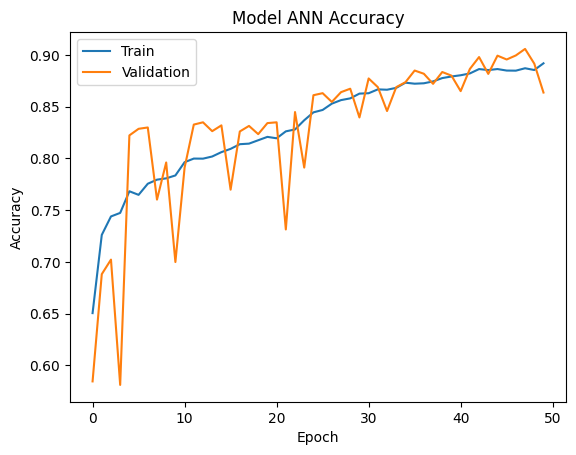

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model ANN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Evaluation on the test data

In binary classification, the output layer of the neural network typically uses the sigmoid activation function, which produces values between 0 and 1. So when making predictions, we obtain a probability of belonging to the positive class.

In [ ]:
# Let's make predictions on test data
Y_pred = model.predict(X_test)
Y_pred

885/885 [==============================] - 5s 6ms/step


array([[0.99793404],
       [0.9931249 ],
       [0.17097564],
       ...,
       [0.16095574],
       [0.01851113],
       [0.09876032]], dtype=float32)

In [ ]:
# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary = (Y_pred > 0.5).astype(int)
y_pred_binary

In [ ]:
# Evaluation on test set
accuracy = accuracy_score(y_test, y_pred_binary)
print('The test accuracy is:',accuracy)

The test accuracy is: 0.8611640884368157


**Observations:**

- The Artificial Neural Network was able to learn consistently over 50 epochs and predicted on test set wtih an accuracy of 86%.
- The model is not overfitting as seen on the accuracies plot.

Let's build a second more complexe neural network.


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model2 = Sequential()
model2.add(Dense(activation = 'relu', input_dim = 23, units=256))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))

# We have an output of 1 node, which is the the desired dimensions of our output (Satisfied or Not Satisfied)
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model2.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history2=model2.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1652/1652 [==============================] - 9s 4ms/step - loss: 1.0297 - accuracy: 0.6604 - val_loss: 0.4499 - val_accuracy: 0.8019
Epoch 2/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4948 - accuracy: 0.7669 - val_loss: 0.4100 - val_accuracy: 0.8221
Epoch 3/50
1652/1652 [==============================] - 8s 5ms/step - loss: 0.4603 - accuracy: 0.7876 - val_loss: 0.4298 - val_accuracy: 0.8024
Epoch 4/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.8019 - val_loss: 0.3978 - val_accuracy: 0.8231
Epoch 5/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4313 - accuracy: 0.8089 - val_loss: 0.4386 - val_accuracy: 0.7947
Epoch 6/50
1652/1652 [==============================] - 6s 4ms/step - loss: 0.4195 - accuracy: 0.8143 - val_loss: 0.4020 - val_accuracy: 0.8292
Epoch 7/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8197 - val_loss: 0.3942 - val_accuracy:

###Plot the Training and Validation Accuracies


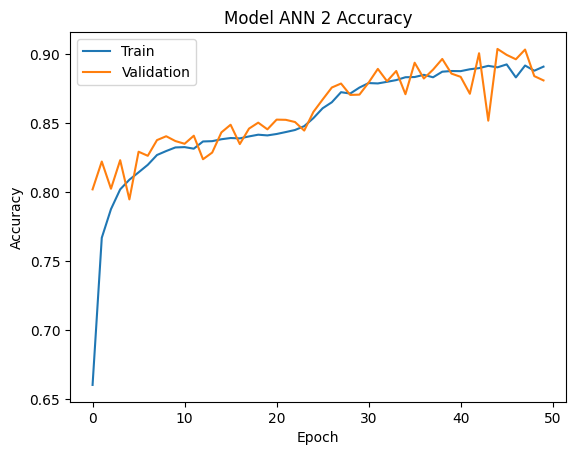

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model ANN 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Evaluation on the test data

In [ ]:
# Let's make predictions on test data
Y_pred2 = model2.predict(X_test)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary2 = (Y_pred2 > 0.5).astype(int)

# Evaluation on test set
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print('The test accuracy is:',accuracy2)

885/885 [==============================] - 2s 2ms/step
The test accuracy is: 0.8797414706505615


**Observations:**

- We improved the performance from 86% to 87% by adding 2 more dense layers.
- The model is not overfitting as seen on the accuracies plot.
- The model learned consistently over the 50 epochs.

Let's change the learning rate with the Adam optimiser, the batch size and the number of epochs.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model3 = Sequential()
model3.add(Dense(activation = 'relu', input_dim = 23, units=256))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))

# We have an output of 1 node, which is the the desired dimensions of our output (Satisfied or Not Satisfied)
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model

# Using Adam Optimizer
opt = Adam(learning_rate = 0.001)

model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model3.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history3=model3.fit(X_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=64,verbose=1)

Epoch 1/100
826/826 [==============================] - 5s 4ms/step - loss: 1.3453 - accuracy: 0.6114 - val_loss: 0.5020 - val_accuracy: 0.7799
Epoch 2/100
826/826 [==============================] - 3s 4ms/step - loss: 0.5627 - accuracy: 0.7275 - val_loss: 0.6975 - val_accuracy: 0.6449
Epoch 3/100
826/826 [==============================] - 5s 6ms/step - loss: 0.4776 - accuracy: 0.7783 - val_loss: 0.4275 - val_accuracy: 0.8031
Epoch 4/100
826/826 [==============================] - 3s 4ms/step - loss: 0.4565 - accuracy: 0.7923 - val_loss: 0.4716 - val_accuracy: 0.7703
Epoch 5/100
826/826 [==============================] - 3s 4ms/step - loss: 0.4482 - accuracy: 0.7979 - val_loss: 0.4071 - val_accuracy: 0.8254
Epoch 6/100
826/826 [==============================] - 4s 4ms/step - loss: 0.4242 - accuracy: 0.8111 - val_loss: 0.3923 - val_accuracy: 0.8293
Epoch 7/100
826/826 [==============================] - 4s 5ms/step - loss: 0.4218 - accuracy: 0.8131 - val_loss: 0.3925 - val_accuracy: 0.8369

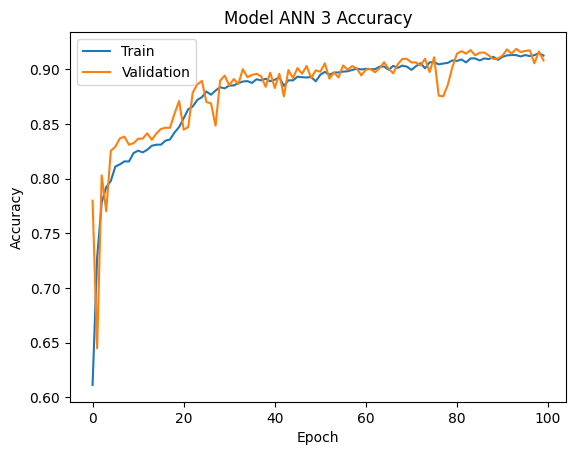

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model ANN 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred3 = model3.predict(X_test)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary3 = (Y_pred3 > 0.5).astype(int)

# Evaluation on test set
accuracy3 = accuracy_score(y_test, y_pred_binary3)
print('The test accuracy is:',accuracy3)

885/885 [==============================] - 1s 1ms/step
The test accuracy is: 0.9043582679946316


**Observations:**

- We improved the performance from 87% to 90% by changing the number f epochs to 100 and the batch size to 64.
- The model is not overfitting as seen on the accuracies plot.
- The model learned consistently over the 100 epochs.

Let's change the Relu activation fucntion to LeakyRelu.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model4 = Sequential()
model4.add(Dense(activation = 'LeakyReLU', input_dim = 23, units=256))
model4.add(Dense(128, activation='LeakyReLU'))
model4.add(Dense(64, activation='LeakyReLU'))
model4.add(Dense(32, activation='LeakyReLU'))

# We have an output of 1 node, which is the the desired dimensions of our output (Satisfied or Not Satisfied)
model4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model

# Using Adam Optimizer
opt = Adam(learning_rate = 0.001)

model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model4.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history4=model4.fit(X_train, y_train,
          validation_split=0.2,
          epochs=400,
          batch_size=128,verbose=1)

Epoch 1/400
413/413 [==============================] - 5s 8ms/step - loss: 2.5697 - accuracy: 0.5581 - val_loss: 0.5887 - val_accuracy: 0.7060
Epoch 2/400
413/413 [==============================] - 2s 5ms/step - loss: 0.7094 - accuracy: 0.6519 - val_loss: 0.5750 - val_accuracy: 0.7045
Epoch 3/400
413/413 [==============================] - 2s 5ms/step - loss: 0.6232 - accuracy: 0.6960 - val_loss: 0.6005 - val_accuracy: 0.6701
Epoch 4/400
413/413 [==============================] - 2s 5ms/step - loss: 0.5353 - accuracy: 0.7438 - val_loss: 0.6559 - val_accuracy: 0.6744
Epoch 5/400
413/413 [==============================] - 2s 5ms/step - loss: 0.8519 - accuracy: 0.7447 - val_loss: 2.0300 - val_accuracy: 0.5138
Epoch 6/400
413/413 [==============================] - 2s 6ms/step - loss: 0.5538 - accuracy: 0.7482 - val_loss: 0.4256 - val_accuracy: 0.8069
Epoch 7/400
413/413 [==============================] - 3s 7ms/step - loss: 0.4975 - accuracy: 0.7695 - val_loss: 0.4270 - val_accuracy: 0.8018

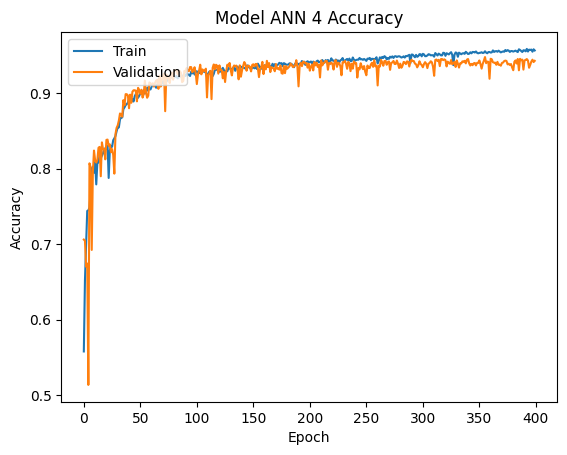

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model ANN 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred4 = model4.predict(X_test)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary4 = (Y_pred4 > 0.5).astype(int)

# Evaluation on test set
accuracy4 = accuracy_score(y_test, y_pred_binary4)
print('The test accuracy is:',accuracy4)

885/885 [==============================] - 1s 1ms/step
The test accuracy is: 0.9398530762167125


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     12787
           1       0.94      0.95      0.95     15527

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



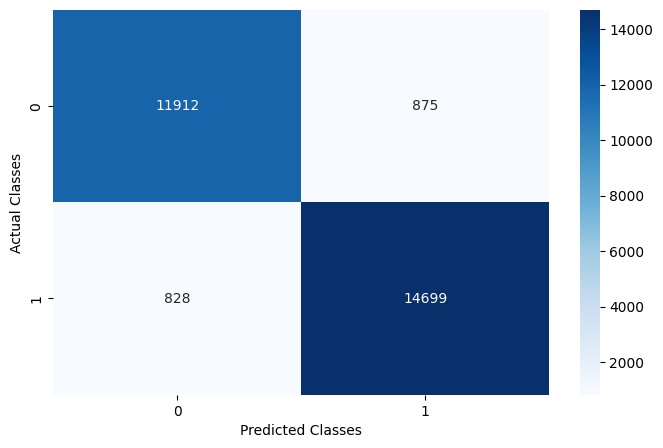

In [ ]:
# Printing the classification report
print(classification_report(y_test, y_pred_binary4))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_binary4)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',cmap='Blues')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

The best ANN model gave a performance of 94% accuracy on test set.

Let's explore **feature engineering** and create a new feature among these foloowing examples based on the three most relevant features:

- **Interaction Feature**: Create an interaction feature by multiplying or combining the ratings of Onboard Entertainment, Seat Comfort, and Ease of Online Booking. This new feature can capture the combined effect of these three important features.

- **Average Rating**: Compute the average rating of Onboard Entertainment, Seat Comfort, and Ease of Online Booking. This average rating can be a representative feature that summarizes the overall satisfaction level of the passengers.

- **Difference in Ratings**: Calculate the difference between the ratings of Onboard Entertainment and Seat Comfort. This feature can capture the preference of passengers towards entertainment or comfort.

- **Age Group**: If the Age feature is available, you can create age groups (e.g., Young, Adult, Senior) to capture the influence of different age ranges on the target variable.

## 5. Feature Engineering

### Feature Engineering Exploration

- Interaction Feature

In [ ]:
# Creating a copy of X_train and X_test
X_train_eng=X_train.copy()
X_test_eng=X_test.copy()

In [ ]:
# Creating the new feature "Interaction_Feature"
X_train_eng['Interaction_Feature'] = X_train['Onboard_Entertainment'] * X_train['Seat_Comfort'] * X_train['Ease_of_Online_Booking']
X_test_eng['Interaction_Feature'] = X_test['Onboard_Entertainment'] * X_test['Seat_Comfort'] * X_test['Ease_of_Online_Booking']

In [ ]:
X_train_eng

Seat_Comfort  Seat_Class  Arrival_Time_Convenient  Catering  \
16280             3           0                        5         4   
65782             3           1                        4         3   
92958             4           1                        4         4   
15276             3           0                        3         3   
64291             0           1                        0         3   
...             ...         ...                      ...       ...   
21440             4           0                        4         4   
73349             3           1                        3         3   
50057             5           1                        5         5   
5192              5           0                        3         4   
77708             2           0                        3         3   

       Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
16280                  1                     5                      4   
65782                  3                     5                      5   
92958                  4                     5                      5   
15276                  3                     3                      4   
64291                  1                     1                      0   
...                  ...                   ...                    ...   
21440                  4                     3                      4   
73349                  3                     4                      4   
50057                  5                     2                      4   
5192                   3                     5                      5   
77708                  3                     3                      4   

       Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
16280               4                       5                3        2   
65782               4                       5                5        5   
92958               4                       4                4        4   
15276               5                       4                4        4   
64291               1                       1                3        1   
...               ...                     ...              ...      ...   
21440               4                       5                5        5   
73349               5                       4                4        5   
50057               2                       5                4        5   
5192                5                       5                3        5   
77708               3                       2                2        2   

       Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  \
16280                 3                4            5                5   
65782                 5                4            5                5   
92958                 4                3            4                4   
15276                 4                5            4                4   
64291                 1                4            5                1   
...                 ...              ...          ...              ...   
21440                 5                5            5                4   
73349                 4                4            4                5   
50057                 5                1            5                4   
5192                  5                4            2                5   
77708                 2                2            2                1   

       Gender  Customer_Type      Age  Type_Travel  Travel_Class  \
16280       1              0 27.00000            0             1   
65782       1              0 33.00000            0             1   
92958       1              0 42.00000            1             0   
15276       1              0 57.00000            1             0   
64291       1              0 28.00000            1             1   
...       ...            ...      ...          ...           ...   
21440       0          

In [ ]:
X_test_eng

Seat_Comfort  Seat_Class  Arrival_Time_Convenient  Catering  \
45654             3           0                        3         3   
5978              2           1                        2         2   
18758             2           0                        2         2   
88394             5           0                        5         5   
1833              1           1                        4         1   
...             ...         ...                      ...       ...   
79493             3           1                        3         3   
50206             3           0                        5         3   
8322              4           1                        4         4   
2548              2           1                        2         2   
70937             4           0                        5         4   

       Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
45654                  3                     3                      5   
5978                   2                     2                      5   
18758                  2                     5                      3   
88394                  5                     5                      5   
1833                   4                     1                      5   
...                  ...                   ...                    ...   
79493                  3                     5                      3   
50206                  5                     3                      3   
8322                   4                     1                      4   
2548                   1                     2                      2   
70937                  3                     2                      4   

       Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
45654               4                       5                5        5   
5978                5                       4                4        4   
18758               2                       5                5        5   
88394               5                       3                5        3   
1833                5                       5                4        4   
...               ...                     ...              ...      ...   
79493               3                       3                3        3   
50206               3                       3                1        2   
8322                1                       1                3        3   
2548                2                       2                4        1   
70937               2                       2                3        2   

       Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  \
45654                 5                3            5                4   
5978                  4                5            4                3   
18758                 5                2            5                4   
88394                 4                5            1                5   
1833                  5                5            4                5   
...                 ...              ...          ...              ...   
79493                 3                1            3                1   
50206                 4                5            4                3   
8322                  4                5            4                1   
2548                  1                1            2                2   
70937                 5                3            5                2   

       Gender  Customer_Type      Age  Type_Travel  Travel_Class  \
45654       1              0 41.00000            1             0   
5978        0              0 50.00000            1             0   
18758       0              0 46.00000            1             0   
88394       1              0 45.00000            1             1   
1833        0              0 26.00000            0             1   
...       ...            ...      ...          ...           ...   
79493       1          

**Observations:**

The new feature is created and is an integer.

Now let's train the ANN model on the X_train_eng that contains the new feature, together with the 3 individual features.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model5 = Sequential()

# Adding the additional dimension 23+1
model5.add(Dense(activation = 'LeakyReLU', input_dim = 24, units=256))
model5.add(Dense(128, activation='LeakyReLU'))
model5.add(Dense(64, activation='LeakyReLU'))
model5.add(Dense(32, activation='LeakyReLU'))

# We have an output of 1 node, which is the the desired dimensions of our output (Satisfied or Not Satisfied)
model5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model

# Using Adam Optimizer
opt = Adam(learning_rate = 0.001)

model5.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6400      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,665
Trainable params: 49,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model5.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history5=model5.fit(X_train_eng, y_train,
          validation_split=0.2,
          epochs=300,
          batch_size=128,verbose=1)

Epoch 1/300
413/413 [==============================] - 8s 4ms/step - loss: 2.4284 - accuracy: 0.6286 - val_loss: 0.6471 - val_accuracy: 0.6799
Epoch 2/300
413/413 [==============================] - 1s 4ms/step - loss: 0.7306 - accuracy: 0.6959 - val_loss: 0.4737 - val_accuracy: 0.7867
Epoch 3/300
413/413 [==============================] - 2s 4ms/step - loss: 0.5138 - accuracy: 0.7633 - val_loss: 0.4234 - val_accuracy: 0.8153
Epoch 4/300
413/413 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7693 - val_loss: 0.6694 - val_accuracy: 0.6985
Epoch 5/300
413/413 [==============================] - 1s 3ms/step - loss: 0.4557 - accuracy: 0.7945 - val_loss: 0.4095 - val_accuracy: 0.8204
Epoch 6/300
413/413 [==============================] - 1s 3ms/step - loss: 0.4820 - accuracy: 0.7848 - val_loss: 0.4449 - val_accuracy: 0.7898
Epoch 7/300
413/413 [==============================] - 1s 3ms/step - loss: 0.4590 - accuracy: 0.7921 - val_loss: 0.4098 - val_accuracy: 0.8226

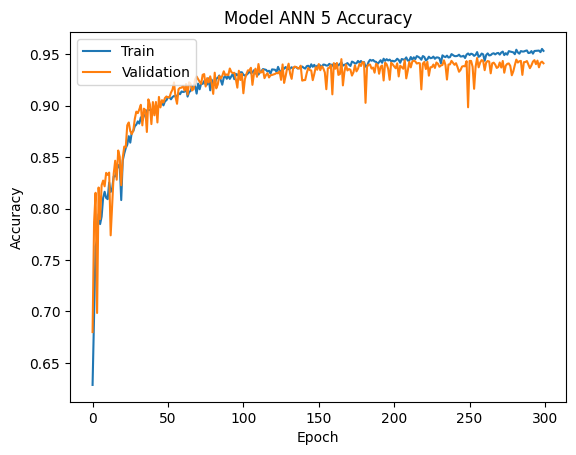

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model ANN 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred5 = model5.predict(X_test_eng)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary5 = (Y_pred5 > 0.5).astype(int)

# Evaluation on test set
accuracy5 = accuracy_score(y_test, y_pred_binary5)
print('The test accuracy is:',accuracy5)

885/885 [==============================] - 1s 1ms/step
The test accuracy is: 0.9403122130394858


**Observations:**

We improved the performance from 93.9% to 94% by creating the Interaction Feature. Let us try another engineered feature.

- Average Feature

In [ ]:
# Creating a copy of X_train and X_test
X_train_eng=X_train.copy()
X_test_eng=X_test.copy()

In [ ]:
# Creating the new feature "Average_Feature"
X_train_eng['Average_Feature'] = X_train[['Onboard_Entertainment', 'Seat_Comfort', 'Ease_of_Online_Booking']].mean(axis=1)
X_test_eng['Average_Feature'] = X_test[['Onboard_Entertainment', 'Seat_Comfort', 'Ease_of_Online_Booking']].mean(axis=1)

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model51.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history51=model5.fit(X_train_eng, y_train,
          validation_split=0.2,
          epochs=300,
          batch_size=128,verbose=1)

Epoch 1/300
413/413 [==============================] - 2s 5ms/step - loss: 0.1837 - accuracy: 0.9250 - val_loss: 0.1665 - val_accuracy: 0.9326
Epoch 2/300
413/413 [==============================] - 3s 6ms/step - loss: 0.1489 - accuracy: 0.9373 - val_loss: 0.1564 - val_accuracy: 0.9364
Epoch 3/300
413/413 [==============================] - 3s 8ms/step - loss: 0.1447 - accuracy: 0.9388 - val_loss: 0.1552 - val_accuracy: 0.9370
Epoch 4/300
413/413 [==============================] - 2s 5ms/step - loss: 0.1377 - accuracy: 0.9413 - val_loss: 0.1678 - val_accuracy: 0.9339
Epoch 5/300
413/413 [==============================] - 2s 5ms/step - loss: 0.1318 - accuracy: 0.9437 - val_loss: 0.1704 - val_accuracy: 0.9319
Epoch 6/300
413/413 [==============================] - 2s 5ms/step - loss: 0.1365 - accuracy: 0.9423 - val_loss: 0.1610 - val_accuracy: 0.9370
Epoch 7/300
413/413 [==============================] - 2s 5ms/step - loss: 0.1313 - accuracy: 0.9440 - val_loss: 0.1578 - val_accuracy: 0.9348

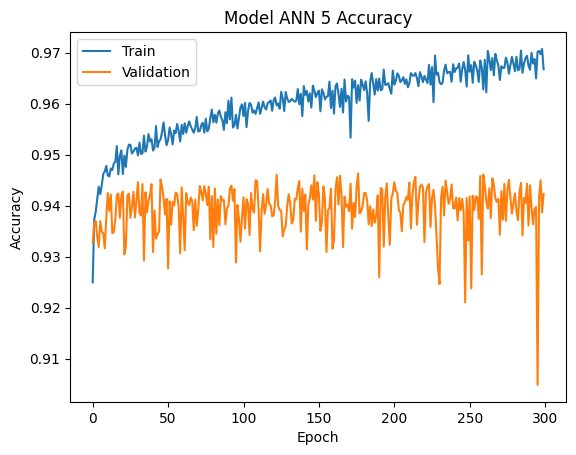

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history51.history['accuracy'])
plt.plot(history51.history['val_accuracy'])
plt.title('Model ANN 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred5 = model5.predict(X_test_eng)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary5 = (Y_pred5 > 0.5).astype(int)

# Evaluation on test set
accuracy5 = accuracy_score(y_test, y_pred_binary5)
print('The test accuracy is:',accuracy5)

885/885 [==============================] - 3s 3ms/step
The test accuracy is: 0.9394292576110758


**Observations:**

We did not improve the performance by creating the Average Feature and the nmodel is overfitting. Let us try another engineered feature.

- Difference in Ratings Feature

In [ ]:
# Creating a copy of X_train and X_test
X_train_eng=X_train.copy()
X_test_eng=X_test.copy()

In [ ]:
# Creating the new feature "Difference_Ratings"
X_train_eng['Difference_Ratings'] = X_train['Onboard_Entertainment'] - X_train['Seat_Comfort']
X_test_eng['Difference_Ratings'] = X_test['Onboard_Entertainment'] - X_test['Seat_Comfort']

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model52.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history52=model5.fit(X_train_eng, y_train,
          validation_split=0.2,
          epochs=300,
          batch_size=128,verbose=1)

Epoch 1/300
413/413 [==============================] - 4s 6ms/step - loss: 2.5027 - accuracy: 0.5657 - val_loss: 0.6440 - val_accuracy: 0.5818
Epoch 2/300
413/413 [==============================] - 3s 7ms/step - loss: 0.7756 - accuracy: 0.6309 - val_loss: 0.5150 - val_accuracy: 0.7653
Epoch 3/300
413/413 [==============================] - 3s 7ms/step - loss: 0.5600 - accuracy: 0.7119 - val_loss: 0.4682 - val_accuracy: 0.7881
Epoch 4/300
413/413 [==============================] - 2s 5ms/step - loss: 0.5467 - accuracy: 0.7362 - val_loss: 0.6969 - val_accuracy: 0.6622
Epoch 5/300
413/413 [==============================] - 3s 8ms/step - loss: 0.4952 - accuracy: 0.7664 - val_loss: 0.4852 - val_accuracy: 0.7516
Epoch 6/300
413/413 [==============================] - 2s 5ms/step - loss: 0.4693 - accuracy: 0.7841 - val_loss: 0.4412 - val_accuracy: 0.8143
Epoch 7/300
413/413 [==============================] - 2s 5ms/step - loss: 0.4711 - accuracy: 0.7823 - val_loss: 0.4746 - val_accuracy: 0.7966

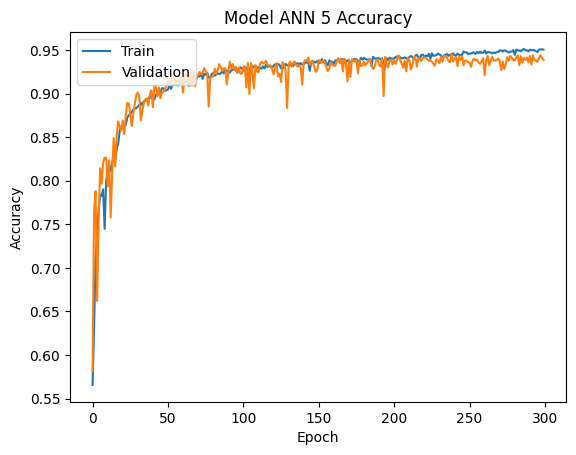

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history52.history['accuracy'])
plt.plot(history52.history['val_accuracy'])
plt.title('Model ANN 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred5 = model5.predict(X_test_eng)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary5 = (Y_pred5 > 0.5).astype(int)

# Evaluation on test set
accuracy5 = accuracy_score(y_test, y_pred_binary5)
print('The test accuracy is:',accuracy5)

885/885 [==============================] - 2s 2ms/step
The test accuracy is: 0.9379458924913471


**Observations:**

We did not improve the performance by creating the Difference in Ratings Feature. Let us try another engineered feature.

- Age Group

In [ ]:
# Creating a copy of X_train and X_test
X_train_eng=X_train.copy()
X_test_eng=X_test.copy()

In [ ]:
# Binning the Age column
bins = [0, 13, 25, 40, 65, np.inf] # np.inf is an infinitely large number

names = ['<13', '13-25', '25-40', '40-65', '65+']

X_train_eng['Age'] = pd.cut(X_train_eng['Age'], bins, labels = names)
X_test_eng['Age'] = pd.cut(X_test_eng['Age'], bins, labels = names)

In [ ]:
# Encoding the Age column
mapping_age = {'<13': 0, '13-25': 1, '25-40': 2, '40-65': 3, '65+': 4}
X_train_eng['Age'] = X_train_eng['Age'].map(mapping_age)
X_test_eng['Age'] = X_test_eng['Age'].map(mapping_age)

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_model41.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history41=model4.fit(X_train_eng, y_train,
          validation_split=0.2,
          epochs=300,
          batch_size=128,verbose=1)

Epoch 1/300
413/413 [==============================] - 6s 8ms/step - loss: 2.8334 - accuracy: 0.5585 - val_loss: 0.8068 - val_accuracy: 0.5537
Epoch 2/300
413/413 [==============================] - 2s 5ms/step - loss: 0.7694 - accuracy: 0.6449 - val_loss: 0.9031 - val_accuracy: 0.5844
Epoch 3/300
413/413 [==============================] - 3s 6ms/step - loss: 0.5865 - accuracy: 0.7037 - val_loss: 0.4682 - val_accuracy: 0.7702
Epoch 4/300
413/413 [==============================] - 4s 10ms/step - loss: 0.5321 - accuracy: 0.7519 - val_loss: 0.7386 - val_accuracy: 0.6520
Epoch 5/300
413/413 [==============================] - 3s 8ms/step - loss: 0.4857 - accuracy: 0.7731 - val_loss: 0.5042 - val_accuracy: 0.7497
Epoch 6/300
413/413 [==============================] - 2s 5ms/step - loss: 0.4716 - accuracy: 0.7853 - val_loss: 0.4601 - val_accuracy: 0.7801
Epoch 7/300
413/413 [==============================] - 2s 5ms/step - loss: 0.4857 - accuracy: 0.7757 - val_loss: 0.4843 - val_accuracy: 0.784

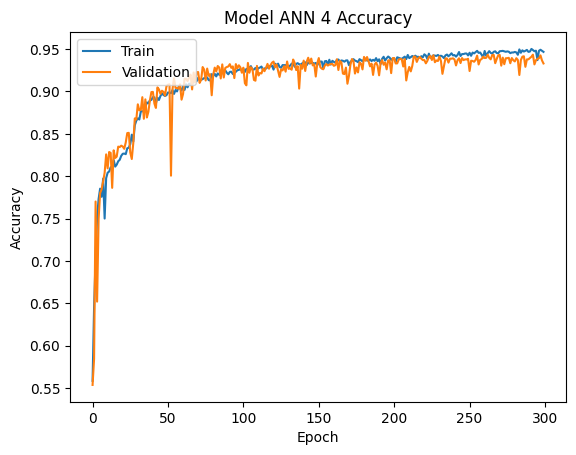

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history41.history['accuracy'])
plt.plot(history41.history['val_accuracy'])
plt.title('Model ANN 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred41 = model4.predict(X_test_eng)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary41 = (Y_pred41 > 0.5).astype(int)

# Evaluation on test set
accuracy41 = accuracy_score(y_test, y_pred_binary41)
print('The test accuracy is:',accuracy41)

885/885 [==============================] - 3s 3ms/step
The test accuracy is: 0.9319064773610228


**Observations:**

We did not improve the performance by creating the Age Group Feature.

### Final Feature Engineering

We will go ahead with the **Interaction Feature**.
See results and plots above for final results.

## 6. Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, LeakyReLU, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Activation

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, Adamax, SGD                       # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping                            # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_1():

    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 64 filters
    model.add(Conv1D(64, (1), activation = 'relu', input_shape = (23, 1)))

    # Adding second conv layer with 32 filters
    model.add(Conv1D(32, (1), activation = 'relu'))

    # Add third conv layer with 32 filters
    model.add(Conv1D(32, (1), activation='relu'))

    # Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 100 neurons
    model.add(Dense(100, activation = 'relu'))

    # Adding the output layer with 1 neurons  and activation function
    model.add(Dense(1, activation = 'sigmoid'))

    # Using Adam Optimizer
    opt = Adam(learning_rate = 0.001)

    # Compiling the model
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Return the compiled model
    return model

In [ ]:
# Let us call the cnn_model_1 function and store the model in a variable
model_1=cnn_model_1()

# Let us print the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 64)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 32)            2080      
                                                                 
 conv1d_2 (Conv1D)           (None, 23, 32)            1056      
                                                                 
 flatten (Flatten)           (None, 736)               0         
                                                                 
 dense (Dense)               (None, 100)               73700     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 77,065
Trainable params: 77,065
Non-traina

In [ ]:
history=model_1.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1652/1652 [==============================] - 20s 5ms/step - loss: 0.4449 - accuracy: 0.8149 - val_loss: 0.2631 - val_accuracy: 0.8922
Epoch 2/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.2622 - accuracy: 0.8936 - val_loss: 0.2368 - val_accuracy: 0.9014
Epoch 3/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.2233 - accuracy: 0.9081 - val_loss: 0.1993 - val_accuracy: 0.9180
Epoch 4/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.1922 - accuracy: 0.9199 - val_loss: 0.1738 - val_accuracy: 0.9239
Epoch 5/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.1711 - accuracy: 0.9280 - val_loss: 0.1585 - val_accuracy: 0.9340
Epoch 6/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.1603 - accuracy: 0.9332 - val_loss: 0.1562 - val_accuracy: 0.9355
Epoch 7/50
1652/1652 [==============================] - 7s 4ms/step - loss: 0.1490 - accuracy: 0.9372 - val_loss: 0.1440 - val_accuracy

###Plot the Training and Validation Accuracies

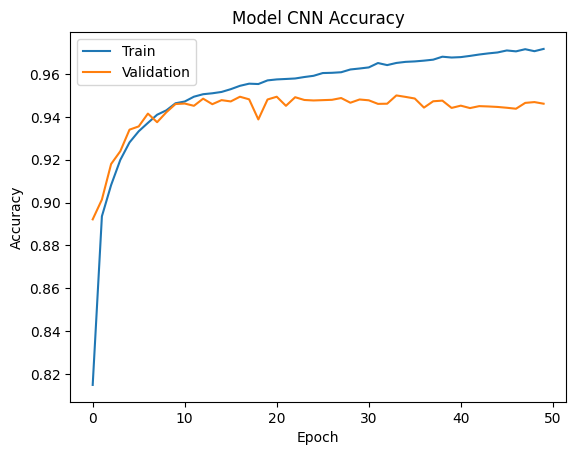

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Evaluation on the test data

In [ ]:
# Let's make predictions on test data
Y_pred1 = model_1.predict(X_test)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary1 = (Y_pred1 > 0.5).astype(int)

# Evaluation on test set
accuracy1 = accuracy_score(y_test, y_pred_binary1)
print('The test accuracy is:',accuracy1)

885/885 [==============================] - 1s 2ms/step
The test accuracy is: 0.9456805820442185


**Observations:**

Let's build a more complex CNN model.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_2():

    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 512 filters
    model.add(Conv1D(512, (1), activation = 'relu', input_shape = (23, 1)))

    # Adding BatchNormalization to stabilize inputs to the dropout layer
    model.add(BatchNormalization())

    # Adding second conv layer with 256 filters
    model.add(Conv1D(256, (1), activation = 'relu'))

    # Add third conv layer with 128 filters
    model.add(Conv1D(128, (1), activation='relu'))

    # Add fourth conv layer with 64 filters
    model.add(Conv1D(64, (1), activation='relu'))

    # Add fifth conv layer with 32 filters
    model.add(Conv1D(32, (1), activation='relu'))

    # Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 100 neurons
    model.add(Dense(100, activation = 'relu'))

    # Adding the output layer with 1 neurons  and activation function
    model.add(Dense(1, activation = 'sigmoid'))

    # Using Adam Optimizer
    opt = Adam(learning_rate = 0.001)

    # Compiling the model
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Return the compiled model
    return model

In [ ]:
# Let us call the cnn_model_1 function and store the model in a variable
model_2=cnn_model_2()

# Let us print the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 512)           1024      
                                                                 
 batch_normalization (BatchN  (None, 23, 512)          2048      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 256)           131328    
                                                                 
 conv1d_2 (Conv1D)           (None, 23, 128)           32896     
                                                                 
 conv1d_3 (Conv1D)           (None, 23, 64)            8256      
                                                                 
 conv1d_4 (Conv1D)           (None, 23, 32)            2080      
                                                        

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_modelcnn2.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history=model_2.fit(X_train, y_train,
          validation_split=0.2,
          epochs=30,
          batch_size=64,verbose=1, callbacks = [es, mc, rlr])

Epoch 1/30
826/826 [==============================] - ETA: 0s - loss: 0.3241 - accuracy: 0.8399
Epoch 1: val_accuracy improved from -inf to 0.91478, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_modelcnn2.h5
826/826 [==============================] - 9s 7ms/step - loss: 0.3241 - accuracy: 0.8399 - val_loss: 0.2028 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 2/30
820/826 [============================>.] - ETA: 0s - loss: 0.1690 - accuracy: 0.9268
Epoch 2: val_accuracy improved from 0.91478 to 0.93786, saving model to /content/drive/MyDrive/MIT Applied DS/Capstone/Facial_emotion_images/best_modelcnn2.h5
826/826 [==============================] - 5s 6ms/step - loss: 0.1689 - accuracy: 0.9269 - val_loss: 0.1475 - val_accuracy: 0.9379 - lr: 0.0010
Epoch 3/30
822/826 [============================>.] - ETA: 0s - loss: 0.1491 - accuracy: 0.9371
Epoch 3: val_accuracy improved from 0.93786 to 0.94074, saving model to /content/drive/MyDrive/MIT Applied DS

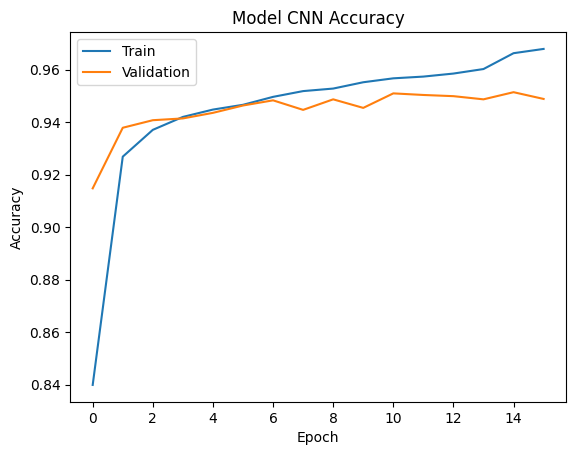

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred2 = model_2.predict(X_test)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary2 = (Y_pred2 > 0.5).astype(int)

# Evaluation on test set
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print('The test accuracy is:',accuracy2)

885/885 [==============================] - 2s 2ms/step
The test accuracy is: 0.9482234936780392


**Observations:**

The model is overfitting, so we'll dropout and maxpooling.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_3():

    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 512 filters
    model.add(Conv1D(512, (1), activation = 'LeakyReLU', input_shape = (23, 1)))

    # Adding BatchNormalization to stabilize inputs to the dropout layer
    model.add(BatchNormalization())

    # Adding second conv layer with 256 filters
    model.add(Conv1D(256, (1), activation = 'LeakyReLU'))

    # Add third conv layer with 128 filters
    model.add(Conv1D(128, (1), activation='LeakyReLU'))

    # Add fourth conv layer with 64 filters
    model.add(Conv1D(64, (1), activation='LeakyReLU'))

    # Add fifth conv layer with 32 filters
    model.add(Conv1D(32, (1), activation='LeakyReLU'))

    # Flattening the output of the conv layer to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 100 neurons
    model.add(Dense(100, activation = 'LeakyReLU'))

    # Adding the output layer with 1 neurons  and activation function
    model.add(Dense(1, activation = 'sigmoid'))

    # Using Adam Optimizer
    opt = Adam(learning_rate = 0.001)

    # Compiling the model
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Return the compiled model
    return model

In [ ]:
# Let us call the cnn_model_1 function and store the model in a variable
model_3=cnn_model_3()

# Let us print the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 512)           1024      
                                                                 
 batch_normalization (BatchN  (None, 23, 512)          2048      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 256)           131328    
                                                                 
 conv1d_2 (Conv1D)           (None, 23, 128)           32896     
                                                                 
 conv1d_3 (Conv1D)           (None, 23, 64)            8256      
                                                                 
 conv1d_4 (Conv1D)           (None, 23, 32)            2080      
                                                        

In [ ]:
# Fine-tuning the hyperparameters in the callback functions
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 5)

mc = ModelCheckpoint('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_modelcnn3.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     verbose = 1,
                     save_best_only = True)

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

history=model_3.fit(X_train, y_train,
          validation_split=0.2,
          epochs=30,
          batch_size=64,verbose=1, callbacks = [es, mc, rlr])

Epoch 1/30
823/826 [============================>.] - ETA: 0s - loss: 0.6308 - accuracy: 0.6304
Epoch 1: val_accuracy improved from -inf to 0.80867, saving model to /content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_modelcnn3.h5
826/826 [==============================] - 9s 7ms/step - loss: 0.6301 - accuracy: 0.6310 - val_loss: 0.4385 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 2/30
820/826 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.8041
Epoch 2: val_accuracy improved from 0.80867 to 0.83100, saving model to /content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_modelcnn3.h5
826/826 [==============================] - 5s 6ms/step - loss: 0.4435 - accuracy: 0.8043 - val_loss: 0.3948 - val_accuracy: 0.8310 - lr: 0.0010
Epoch 3/30
819/826 [============================>.] - ETA: 0s - loss: 0.4025 - accuracy: 0.8253
Epoch 3: val_accuracy improved from 0.83100 to 0.84886, saving model to /content/drive/MyDrive/MIT Applied DS/5 Hackathon/best_modelcnn3.h5
826/826

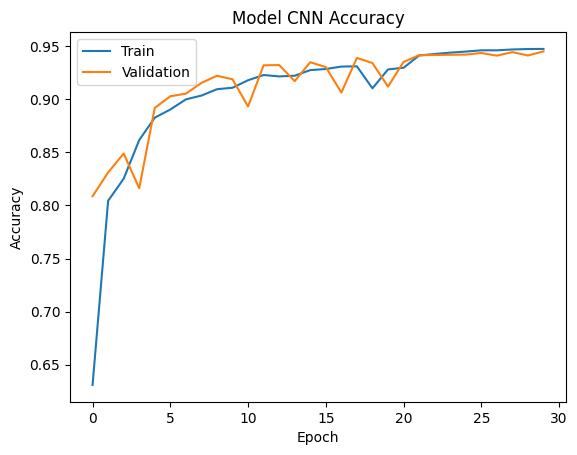

In [ ]:
# Let us evaluate the model by plotting the Training and Validation Accuracies

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Let's make predictions on test data
Y_pred3 = model_3.predict(X_test)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_pred_binary3 = (Y_pred3 > 0.5).astype(int)

# Evaluation on test set
accuracy3 = accuracy_score(y_test, y_pred_binary3)
print('The test accuracy is:',accuracy3)

885/885 [==============================] - 2s 2ms/step
The test accuracy is: 0.945292081655718


## 7.  Support Vector Classifier (SVC)

Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection.

There are specific types of SVMs such as support vector regression (SVR) which is an extension of support vector classification (SVC).

SVMs are different from other classification algorithms because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. The decision boundary created by SVMs is called the maximum margin classifier or the maximum margin hyper plane.

The kernel function is used to transform the input data into a higher-dimensional feature space, where it is easier to find a linear hyperplane that separates the different classes. The kernel function computes the dot product of the transformed input data points, which allows the SVM model to implicitly operate in the higher-dimensional feature space without explicitly computing the transformation.



In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Initialise the SVC
svc1 = svm.SVC(kernel='rbf', verbose=2)  # You can choose different kernels, such as 'linear', 'poly', 'rbf', etc.
svc1.fit(X_train, y_train)

[LibSVM]

SVC(verbose=2)

In [ ]:
# Evaluation on test data
y_pred = svc1.predict(X_test)

accuracysvc1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracysvc1)

Accuracy: 0.6039768312495585


**Observations:**

The performance is poor with 60% accuracy. Let's try another kernel.

In [ ]:
# Initialise the SVC
svc2 = svm.SVC(kernel='linear', verbose=2)  # You can choose different kernels, such as 'linear', 'poly', 'rbf', etc.
svc2.fit(X_train, y_train)

[LibSVM]

In [ ]:
# Evaluation on test data
y_pred = svc2.predict(X_test)

accuracysvc2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracysvc2)

## 8.  Light Gradient Boosting Machine (LightGBM)


LightGBM is a gradient boosting framework that is designed to be efficient and highly performant. It is an open-source, distributed gradient boosting library developed by Microsoft. LightGBM is widely used for solving various machine learning tasks such as classification, regression, and ranking.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model_lgb = lgb.train(params, train_data, num_boost_round=100)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
# Make predictions on the test set
y_pred = model_lgb.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9429610793247157


In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model_lgb2 = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
# Make predictions on the test set
y_pred = model_lgb2.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9493536766264039


In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model_lgb3 = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
# Make predictions on the test set
y_pred = model_lgb3.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9520378611287702


In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 90,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model_lgb4 = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
# Make predictions on the test set
y_pred = model_lgb4.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9538744084198629


In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 90,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
model_lgb5 = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
# Make predictions on the test set
y_pred = model_lgb5.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9540863177226814


## **Conclusion and Prediction over unseen data**

Our best model is: the **LightGBM**.


Let's predict the overall satisfaction on the unseen data.

### **Loading the unseen data**

In [ ]:
# Importing the dataset from Google Drive
survey_test = pd.read_csv('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/Surveydata_test.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/Traveldata_test.csv')

#survey_test = pd.read_csv("Surveydata_test.csv")
#travel_test = pd.read_csv("Traveldata_test.csv")

# copying data to another variable to avoid any changes to original data
survey_test = survey_test.copy()
travel_test = travel_test.copy()

# shape of test data
print("Shape of survey test",survey_test.shape)
print("Shape of travel test",travel_test.shape)

Shape of survey test (35602, 16)
Shape of travel test (35602, 9)


### **Data Preprocessing**

Let's apply the same data preprocessing on this unseen dataset.

In [ ]:
# Merging the 2 dataframes on the ID column
dftest=pd.merge(survey_test, travel_test, on='ID', how='inner')

# Looking at the first 5 rows
dftest.head(5)

ID    Seat_Comfort Seat_Class Arrival_Time_Convenient    Catering  \
0  99900001      Acceptable  Green Car              Acceptable  Acceptable   
1  99900002  Extremely Poor   Ordinary                    Good        Poor   
2  99900003       Excellent   Ordinary               Excellent   Excellent   
3  99900004      Acceptable  Green Car               Excellent  Acceptable   
4  99900005       Excellent   Ordinary          Extremely Poor   Excellent   

   Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0         Manageable    Needs Improvement             Excellent   
1         Manageable           Acceptable                  Poor   
2    Very Convenient            Excellent             Excellent   
3    Very Convenient                 Poor            Acceptable   
4  Needs Improvement            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  \
0          Excellent            Good          Excellent            Poor   
1               Good      Acceptable          Excellent      Acceptable   
2  Needs Improvement            Good  Needs Improvement       Excellent   
3          Excellent       Excellent          Excellent            Poor   
4          Excellent       Excellent          Excellent       Excellent   

   Gender      Customer_Type      Age      Type_Travel Travel_Class  \
0  Female                NaN 36.00000  Business Travel     Business   
1  Female  Disloyal Customer 21.00000  Business Travel     Business   
2    Male     Loyal Customer 60.00000  Business Travel     Business   
3  Female     Loyal Customer 29.00000  Personal Travel          Eco   
4    Male  Disloyal Customer 18.00000  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              532                  0.00000                0.00000  
1             1425                  9.00000               28.00000  
2             2832                  0.00000                0.00000  
3             1352                  0.00000                0.00000  
4             1610                 17.00000                0.00000

In [ ]:
# Copying the dataframe
dftest_orig = dftest.copy()

# Dropping the "ID" column
dftest.drop(columns = "ID", inplace = True)

In [ ]:
# Filling missing value for Age, Departure_Delay_in_Mins and Arrival_Delay_in_Mins using the median
dftest['Age'] = dftest['Age'].fillna(dftest['Age'].median())
dftest['Departure_Delay_in_Mins'] = dftest['Departure_Delay_in_Mins'].fillna(dftest['Departure_Delay_in_Mins'].median())
dftest['Arrival_Delay_in_Mins'] = dftest['Arrival_Delay_in_Mins'].fillna(dftest['Arrival_Delay_in_Mins'].median())

In [ ]:
# Filling missing other missing values using the mode of the column
dftest['Seat_Comfort'] = dftest['Seat_Comfort'].fillna('Acceptable')
dftest['Arrival_Time_Convenient'] = dftest['Arrival_Time_Convenient'].fillna('Good')
dftest['Catering'] = dftest['Catering'].fillna('Acceptable')
dftest['Platform_Location'] = dftest['Platform_Location'].fillna('Manageable')
dftest['Onboard_Wifi_Service'] = dftest['Onboard_Wifi_Service'].fillna('Good')
dftest['Onboard_Entertainment'] = dftest['Onboard_Entertainment'].fillna('Good')
dftest['Online_Support'] = dftest['Online_Support'].fillna('Good')
dftest['Ease_of_Online_Booking'] = dftest['Ease_of_Online_Booking'].fillna('Good')
dftest['Onboard_Service'] = dftest['Onboard_Service'].fillna('Good')
dftest['Legroom'] = dftest['Legroom'].fillna('Good')
dftest['Baggage_Handling'] = dftest['Baggage_Handling'].fillna('Good')
dftest['CheckIn_Service'] = dftest['CheckIn_Service'].fillna('Good')
dftest['Cleanliness'] = dftest['Cleanliness'].fillna('Good')
dftest['Online_Boarding'] = dftest['Online_Boarding'].fillna('Good')
dftest['Gender'] = dftest['Gender'].fillna('Female')
dftest['Customer_Type'] = dftest['Customer_Type'].fillna('Loyal Customer')
dftest['Type_Travel'] = dftest['Type_Travel'].fillna('Business Travel')

In [ ]:
# let's check that there are no missing values in the data
round(dftest.isnull().sum() / dftest.isnull().count() * 100, 2)

Seat_Comfort              0.00000
Seat_Class                0.00000
Arrival_Time_Convenient   0.00000
Catering                  0.00000
Platform_Location         0.00000
Onboard_Wifi_Service      0.00000
Onboard_Entertainment     0.00000
Online_Support            0.00000
Ease_of_Online_Booking    0.00000
Onboard_Service           0.00000
Legroom                   0.00000
Baggage_Handling          0.00000
CheckIn_Service           0.00000
Cleanliness               0.00000
Online_Boarding           0.00000
Gender                    0.00000
Customer_Type             0.00000
Age                       0.00000
Type_Travel               0.00000
Travel_Class              0.00000
Travel_Distance           0.00000
Departure_Delay_in_Mins   0.00000
Arrival_Delay_in_Mins     0.00000
dtype: float64

In [ ]:
#Encoding
mapping_gender = {'Male': 0, 'Female': 1}
dftest['Gender'] = dftest['Gender'].map(mapping_gender)

mapping_customer_type = {'Loyal Customer': 0, 'Disloyal Customer': 1}
dftest['Customer_Type'] = dftest['Customer_Type'].map(mapping_customer_type)

mapping_type_travel = {'Personal Travel': 0, 'Business Travel': 1}
dftest['Type_Travel'] = dftest['Type_Travel'].map(mapping_type_travel)

mapping_travel_class = {'Business': 0, 'Eco': 1}
dftest['Travel_Class'] = dftest['Travel_Class'].map(mapping_travel_class)

mapping_platform_loc = {'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5}
dftest['Platform_Location'] = dftest['Platform_Location'].map(mapping_platform_loc)

mapping_seat_class = {'Ordinary': 0, 'Green Car': 1}
dftest['Seat_Class'] = dftest['Seat_Class'].map(mapping_seat_class)

mapping = {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5}
dftest['Seat_Comfort'] = dftest['Seat_Comfort'].map(mapping)
dftest['Arrival_Time_Convenient'] = dftest['Arrival_Time_Convenient'].map(mapping)
dftest['Catering'] = dftest['Catering'].map(mapping)
dftest['Onboard_Wifi_Service'] = dftest['Onboard_Wifi_Service'].map(mapping)
dftest['Onboard_Entertainment'] = dftest['Onboard_Entertainment'].map(mapping)
dftest['Online_Support'] = dftest['Online_Support'].map(mapping)
dftest['Ease_of_Online_Booking'] = dftest['Ease_of_Online_Booking'].map(mapping)
dftest['Onboard_Service'] = dftest['Onboard_Service'].map(mapping)
dftest['Legroom'] = dftest['Legroom'].map(mapping)
dftest['Baggage_Handling'] = dftest['Baggage_Handling'].map(mapping)
dftest['CheckIn_Service'] = dftest['CheckIn_Service'].map(mapping)
dftest['Cleanliness'] = dftest['Cleanliness'].map(mapping)
dftest['Online_Boarding'] = dftest['Online_Boarding'].map(mapping)

In [ ]:
# Adding the engineered feature: Interaction Feature
#dftest['Interaction_Feature'] = dftest['Onboard_Entertainment'] * dftest['Seat_Comfort'] * dftest['Ease_of_Online_Booking']

In [ ]:
X_unseen=dftest.copy()
X_unseen

Seat_Comfort  Seat_Class  Arrival_Time_Convenient  Catering  \
0                 3           1                        3         3   
1                 0           0                        4         1   
2                 5           0                        5         5   
3                 3           1                        5         3   
4                 5           0                        0         5   
...             ...         ...                      ...       ...   
35597             2           1                        5         2   
35598             2           0                        2         4   
35599             4           1                        0         4   
35600             5           0                        5         5   
35601             4           0                        3         4   

       Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0                      3                     2                      5   
1                      3                     3                      1   
2                      5                     5                      5   
3                      5                     1                      3   
4                      2                     5                      5   
...                  ...                   ...                    ...   
35597                  3                     3                      2   
35598                  2                     3                      5   
35599                  2                     2                      4   
35600                  1                     3                      5   
35601                  3                     1                      4   

       Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
0                   4                       5                5        5   
1                   3                       3                5        3   
2                   5                       2                2        2   
3                   5                       1                3        2   
4                   5                       5                4        3   
...               ...                     ...              ...      ...   
35597               3                       3                4        5   
35598               5                       4                4        4   
35599               1                       2                1        3   
35600               4                       5                5        5   
35601               1                       1                3        4   

       Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  \
0                     5                4            5                1   
1                     4                3            5                3   
2                     2                4            2                5   
3                     5                5            5                1   
4                     5                5            5                5   
...                 ...              ...          ...              ...   
35597                 4                3            4                3   
35598                 4                3            4                4   
35599                 1                1            5                2   
35600                 5                3            5                4   
35601                 4                2            4                1   

       Gender  Customer_Type      Age  Type_Travel  Travel_Class  \
0           1              0 36.00000            1             0   
1           1              1 21.00000            1             0   
2           0              0 60.00000            1             0   
3           1              0 29.00000            0             1   
4           0              1 18.00000            1             0   
...       ...            ...      ...          ...           ...   
35597       0          

### **Prediction**

In [ ]:
# Let's make predictions on test data
Y_prediction = model_lgb5.predict(X_unseen)

# Let's convert the predicted probabilities to binary class labels using a threshold of 0.5
y_prediction_binary = (Y_prediction > 0.5).astype(int)

In [ ]:
y_prediction_binary.shape

(35602, 1)

In [ ]:
# Creating the dataframe for the submission file
predictions=y_prediction_binary
ID=dftest_orig['ID']

# Convert predictions to a dataframe and rename column
predictions_df = pd.DataFrame(predictions)
predictions_df.rename(columns={0: 'Overall_Experience'}, inplace=True)

# Concatenate the ID with the predictions for the submission file
submission = pd.concat([ID,predictions_df], axis=1)

submission

ID  Overall_Experience
0      99900001                   1
1      99900002                   1
2      99900003                   1
3      99900004                   0
4      99900005                   1
...         ...                 ...
35597  99935598                   0
35598  99935599                   1
35599  99935600                   0
35600  99935601                   1
35601  99935602                   0

[35602 rows x 2 columns]

In [ ]:
# Saving the file to CSV and dropping the index
submission.to_csv('/content/drive/MyDrive/MIT Applied DS/5 Hackathon/submission.csv', index=False)